In [1]:
import veky_runner
import utility
import copy
from sklearn import preprocessing

# get file list with xsls extension
root = "/projects/d2e32407-baf4-4631-8512-ce12e859eb9c/Priprema DataSeta/Dionice"
extension = ".xlsx"
file_list = utility.get_file_list_from_root_dir(root, extension)
# print(file_list)

# collect data from files
sheet_name = 'Povijesni podaci'
data = utility.collect_data_from_file_list(file_list, sheet_name)
data_c = copy.deepcopy(data)
# parse data and use only specific data
for stock_name in data_c:
    for time_stamp in data_c[stock_name]:
        if data_c[stock_name][time_stamp][u'Vrsta prometa'] != 'N' or time_stamp.year <= 2009:
            del data[stock_name][time_stamp]
del data_c
# print(data)
# get file list with index information
# root = "/projects/d2e32407-baf4-4631-8512-ce12e859eb9c/Priprema DataSeta"
# index_file_list = utility.get_file_list_from_root_dir(root, extension)
# print(index_file_list)

# collect stock index data
# sheet_name = "Sheet1"
# stock_num = utility.collect_data_from_file_list(index_file_list, sheet_name)["dionice"]
# print(stock_num)

# define stock_names and (stock_name, time_stamp) from data, mapping stock_names with time_stamp
stock_names = data.keys()
stock_name_time_stamps = [(stock_name, sorted(list(data[stock_name].keys()))) for stock_name in stock_names]
# print(stock_name_time_stamps)
 # define vectors of date, high, low, close and volume prices for each stock_index_num
high_prices_vecs = utility.extract_vectors_of_specific_data(data, stock_name_time_stamps, u"Najviša")
# print(high_prices_vecs)
low_prices_vecs = utility.extract_vectors_of_specific_data(data, stock_name_time_stamps, u"Najniža")
# print(low_prices_vecs)
close_prices_vecs = utility.extract_vectors_of_specific_data(data, stock_name_time_stamps, u"Zadnja")
# print(close_prices_vecs)
volume_prices_vecs = utility.extract_vectors_of_specific_data(data, stock_name_time_stamps, u"Broj transakcija")
# print(volume_prices_vecs)

# define features
default_period = 14

# rsi_vecs
rsi_vecs = utility.relative_strength_index(close_prices_vecs, default_period)
# plot rsi_vecs
# [utility.plot_data(date_vec[1][default_period:], rsi_vec, stock_name,"date" "rsi")
#  for date_vec, rsi_vec, stock_name in zip(stock_name_time_stamps, rsi_vecs, stock_names)]
# typical_prices_vecs
typical_prices_vecs = utility.typical_prices_vecs(high_prices_vecs, low_prices_vecs, close_prices_vecs)

# mfi_vecs
mfi_vecs = utility.money_flow_index(typical_prices_vecs, volume_prices_vecs, default_period)
# plot mfi_vecs
# [utility.plot_data(date_vec[1][default_period:], mfi_vec, stock_name, "date", "mfi")
#  for date_vec, mfi_vec, stock_name in zip(stock_name_time_stamps, mfi_vecs, stock_names)]

# ema_vecs
ema_vecs = utility.exponential_moving_average(close_prices_vecs, default_period)
# plot ema_vecs
# [utility.plot_data(date_vec[1][default_period:], ema_vec, stock_name, "date", "ema")
#  for date_vec, ema_vec, stock_name in zip(stock_name_time_stamps, ema_vecs, stock_names)]

# so_vecs
so_vecs = utility.stochastic_oscillator(high_prices_vecs, low_prices_vecs, close_prices_vecs, default_period)
# plot so_vecs
# [utility.plot_data(date_vec[1][default_period:], so_vec, stock_name, "date", "so")
#  for date_vec, so_vec, stock_name in zip(stock_name_time_stamps, so_vecs, stock_names)]

# macd_vecs
macd_vecs = utility.moving_average_convergence_divergence(close_prices_vecs, slow_period=26, fast_period=12)
# [utility.plot_data(date_vec[1][len(date_vec[1]) - len(macd_vec):], macd_vec, stock_name, "date", "macd")
#  for date_vec, macd_vec, stock_name in zip(stock_name_time_stamps, macd_vecs, stock_names)]

# sl_vecs
sl_vecs = utility.signal_line(macd_vecs, 9)
# [utility.plot_data(date_vec[1][len(date_vec[1]) - len(sl_vec):], sl_vec, stock_name, "date", "sl")
#  for date_vec, sl_vec, stock_name in zip(stock_name_time_stamps, sl_vecs, stock_names)]

del data, sheet_name, file_list

scaler = preprocessing.StandardScaler()

Analysis for: zse_export_INGR-R-A


type: SVR;
        mse: 0.405230;
        Parameters: {'base_estimator__scoring': None, 'warm_start': False, 'base_estimator__verbose': 0, 'max_samples': 1.0, 'random_state': <mtrand.RandomState object at 0x7f63c05c3438>, 'base_estimator__estimator__coef0': 0.0, 'base_estimator__estimator__shrinking': True, 'n_jobs': 1, 'max_features': 1.0, 'base_estimator__estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'base_estimator__iid': True, 'bootstrap_features': False, 'base_estimator__estimator__degree': 3, 'base_estimator__estimator__kernel': 'rbf', 'base_estimator__error_score': 'raise', 'base_estimator__estimator__cache_size': 200, 'base_estimator__estimator__C': 1.0, 'base_estimator__pre_dispatch': '2*n_jobs', 'base_estimator__estimator__gamma': 'auto', 'base_estimator__estimator__verbose': False, 'verbose': 0, 'base_estimator__fit_params': {}, 'base_estimator__estimator__max_ite

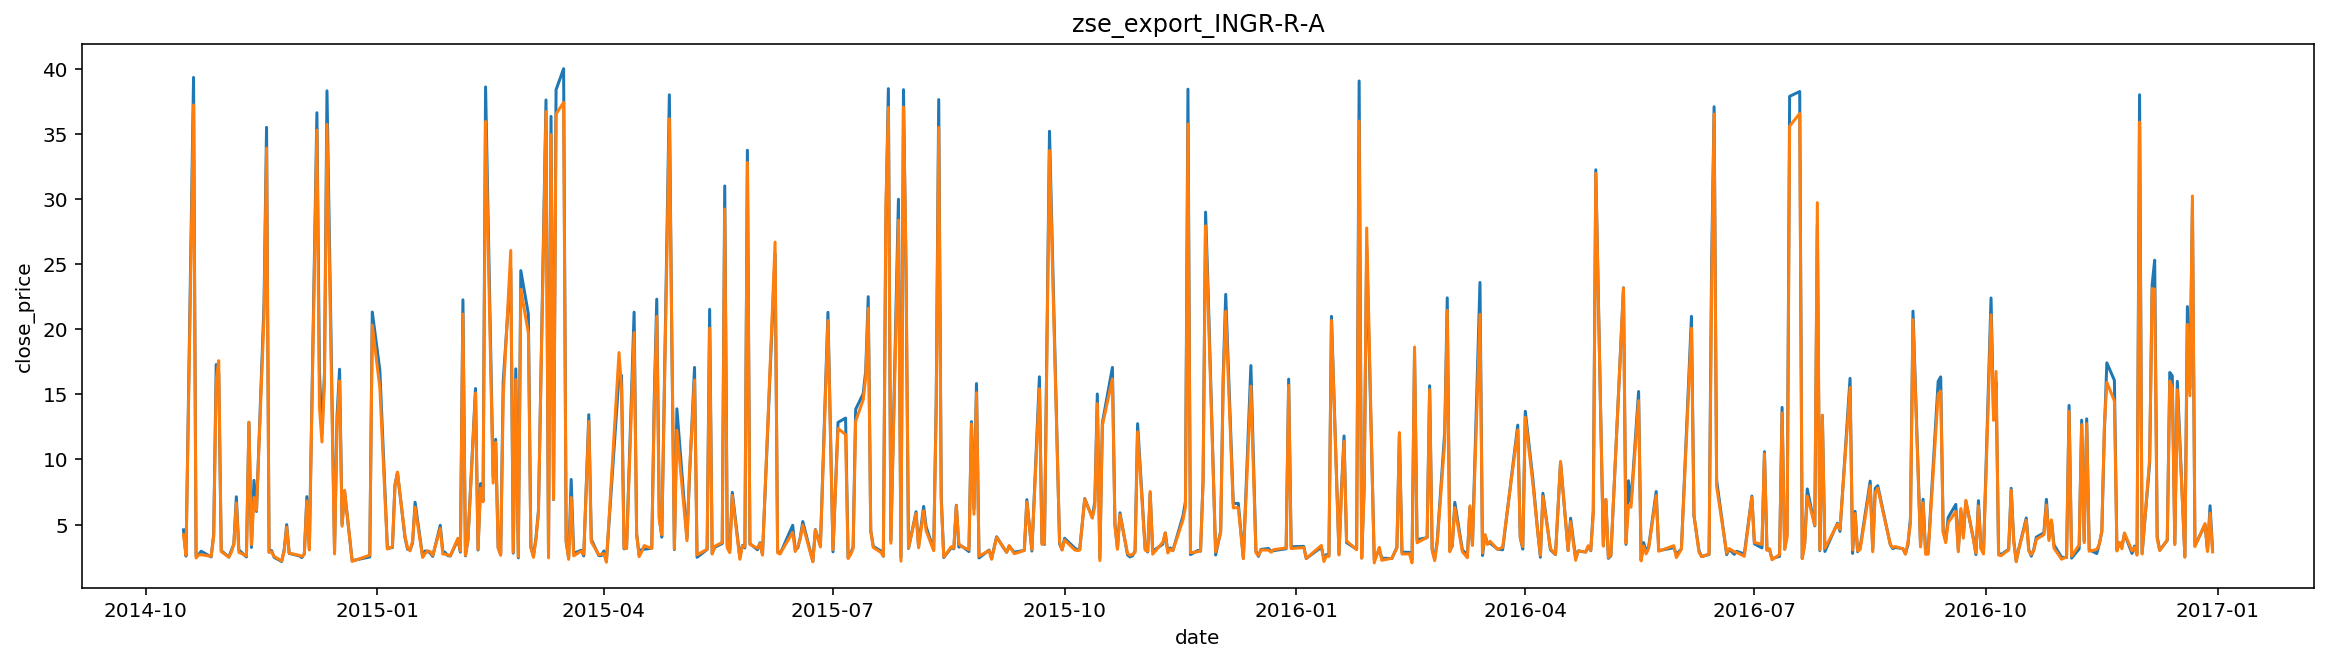

Done for: zse_export_INGR-R-A
Analysis for: zse_export_ATPL-R-A


type: SVR;
        mse: 16024.392094;
        Parameters: {'base_estimator__scoring': None, 'warm_start': False, 'base_estimator__verbose': 0, 'max_samples': 1.0, 'random_state': <mtrand.RandomState object at 0x7f63bb820798>, 'base_estimator__estimator__coef0': 0.0, 'base_estimator__estimator__shrinking': True, 'n_jobs': 1, 'max_features': 1.0, 'base_estimator__estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'base_estimator__iid': True, 'bootstrap_features': True, 'base_estimator__estimator__degree': 3, 'base_estimator__estimator__kernel': 'rbf', 'base_estimator__error_score': 'raise', 'base_estimator__estimator__cache_size': 200, 'base_estimator__estimator__C': 1.0, 'base_estimator__pre_dispatch': '2*n_jobs', 'base_estimator__estimator__gamma': 'auto', 'base_estimator__estimator__verbose': False, 'verbose': 0, 'base_estimator__fit_params': {}, 'base_estimator__estimator__max_

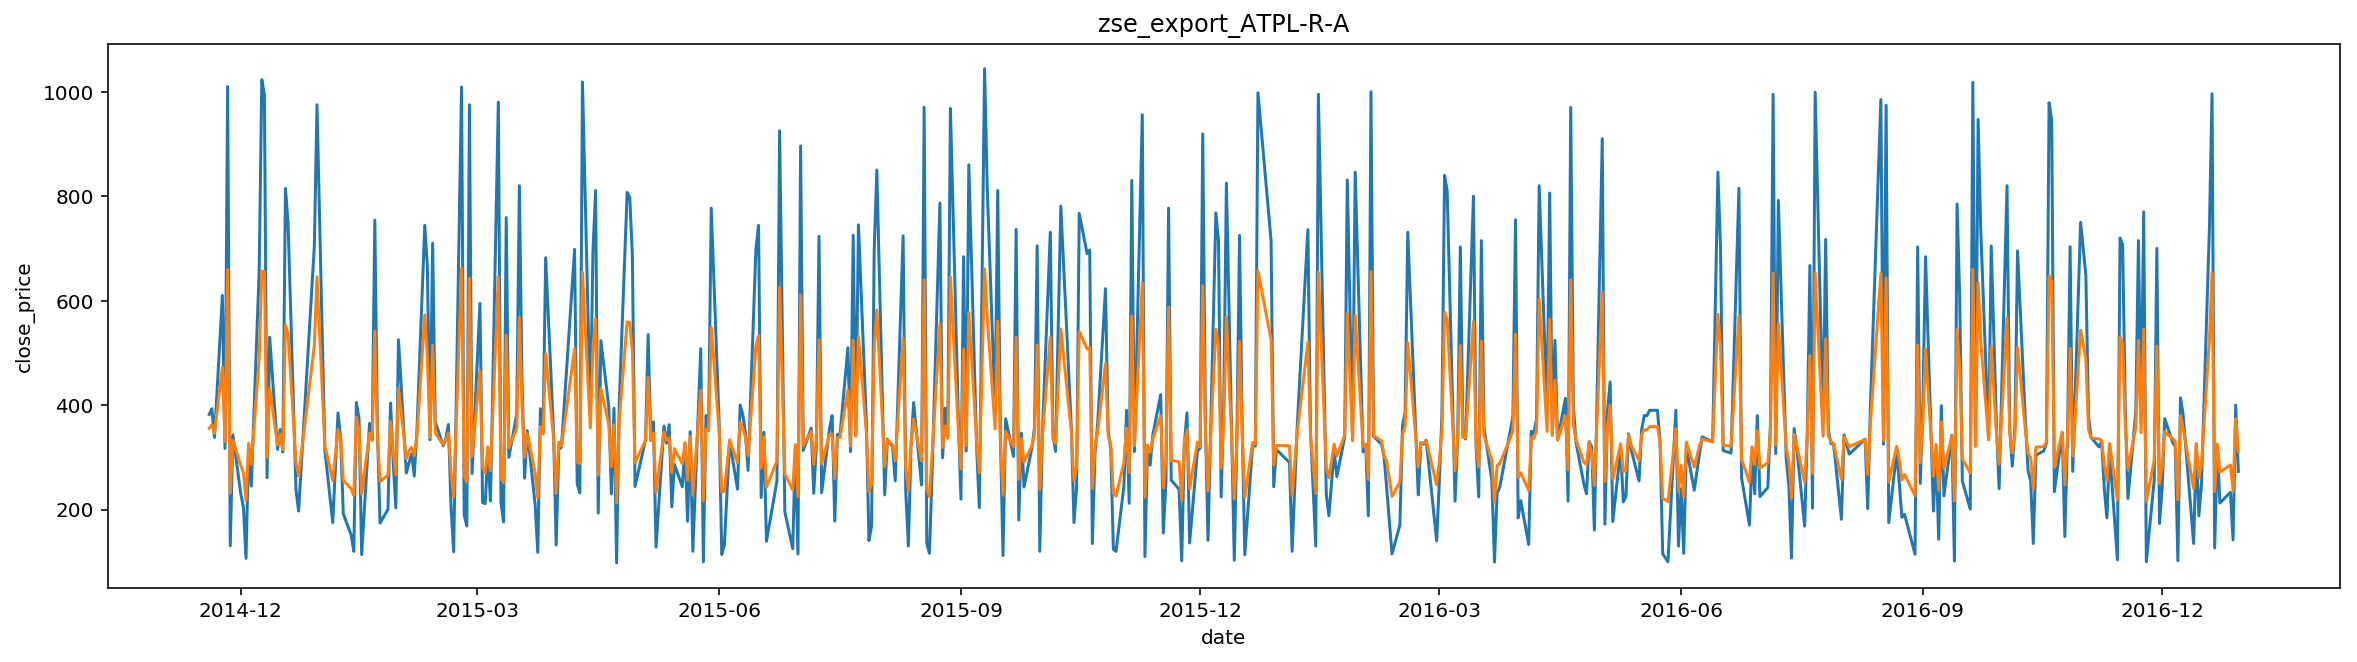

Done for: zse_export_ATPL-R-A
Analysis for: zse_export_IGH-R-A


type: SVR;
        mse: 396835.236119;
        Parameters: {'base_estimator__scoring': None, 'warm_start': False, 'base_estimator__verbose': 0, 'max_samples': 1.0, 'random_state': <mtrand.RandomState object at 0x7f63bb84a990>, 'base_estimator__estimator__coef0': 0.0, 'base_estimator__estimator__shrinking': True, 'n_jobs': 1, 'max_features': 1.0, 'base_estimator__estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'base_estimator__iid': True, 'bootstrap_features': True, 'base_estimator__estimator__degree': 3, 'base_estimator__estimator__kernel': 'rbf', 'base_estimator__error_score': 'raise', 'base_estimator__estimator__cache_size': 200, 'base_estimator__estimator__C': 1.0, 'base_estimator__pre_dispatch': '2*n_jobs', 'base_estimator__estimator__gamma': 'auto', 'base_estimator__estimator__verbose': False, 'verbose': 0, 'base_estimator__fit_params': {}, 'base_estimator__estimator__max

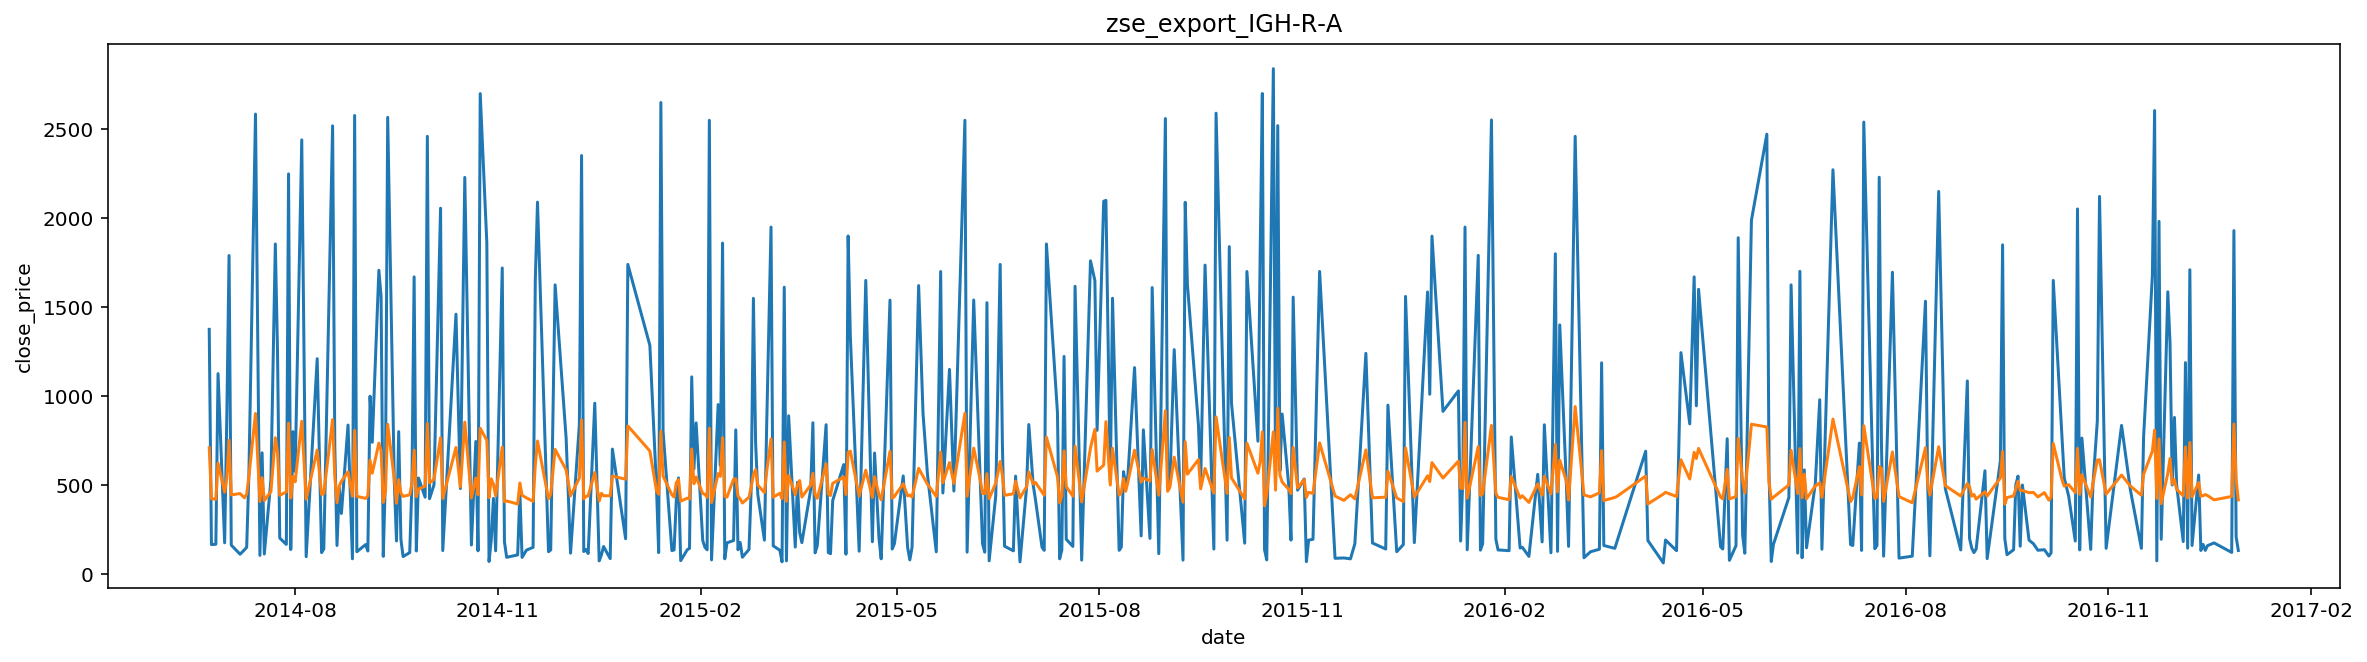

Done for: zse_export_IGH-R-A
Analysis for: zse_export_PODR-R-A


type: SVR;
        mse: 10.111635;
        Parameters: {'base_estimator__scoring': None, 'warm_start': False, 'base_estimator__verbose': 0, 'max_samples': 1.0, 'random_state': <mtrand.RandomState object at 0x7f63bb5df828>, 'base_estimator__estimator__coef0': 0.0, 'base_estimator__estimator__shrinking': True, 'n_jobs': 1, 'max_features': 1.0, 'base_estimator__estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'base_estimator__iid': True, 'bootstrap_features': False, 'base_estimator__estimator__degree': 3, 'base_estimator__estimator__kernel': 'rbf', 'base_estimator__error_score': 'raise', 'base_estimator__estimator__cache_size': 200, 'base_estimator__estimator__C': 1.0, 'base_estimator__pre_dispatch': '2*n_jobs', 'base_estimator__estimator__gamma': 'auto', 'base_estimator__estimator__verbose': False, 'verbose': 0, 'base_estimator__fit_params': {}, 'base_estimator__estimator__max_it

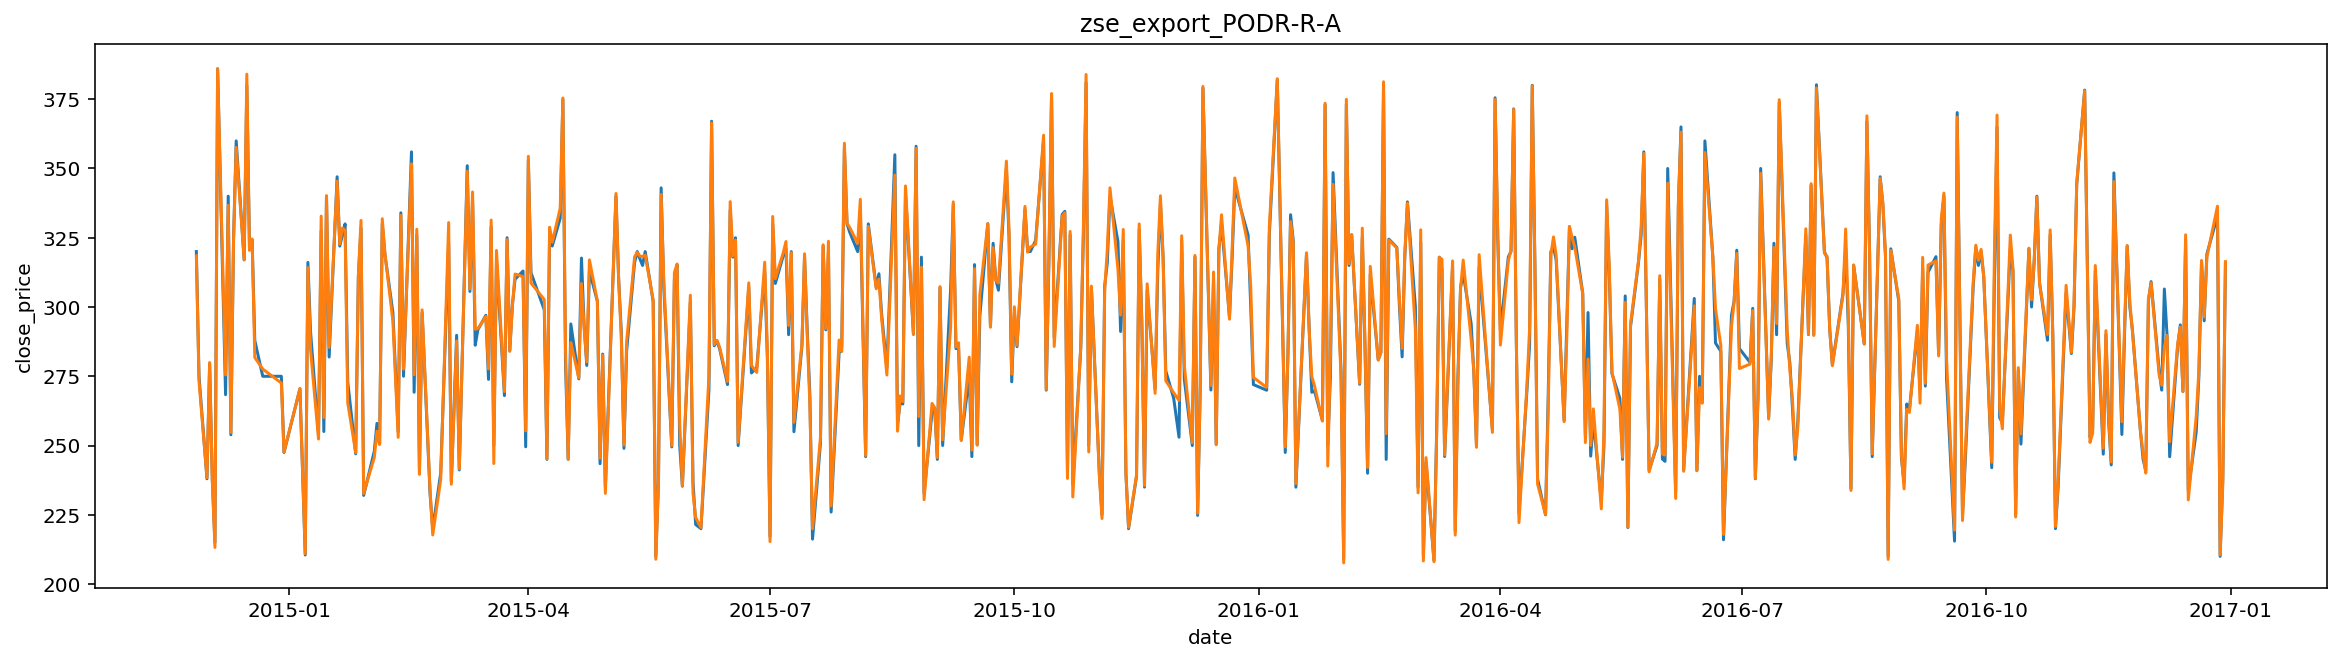

Done for: zse_export_PODR-R-A
Analysis for: zse_export_LEDO-R-A


type: SVR;
        mse: 2600660.442525;
        Parameters: {'base_estimator__scoring': None, 'warm_start': False, 'base_estimator__verbose': 0, 'max_samples': 1.0, 'random_state': <mtrand.RandomState object at 0x7f63baaaed38>, 'base_estimator__estimator__coef0': 0.0, 'base_estimator__estimator__shrinking': True, 'n_jobs': 1, 'max_features': 1.0, 'base_estimator__estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'base_estimator__iid': True, 'bootstrap_features': True, 'base_estimator__estimator__degree': 3, 'base_estimator__estimator__kernel': 'rbf', 'base_estimator__error_score': 'raise', 'base_estimator__estimator__cache_size': 200, 'base_estimator__estimator__C': 1.0, 'base_estimator__pre_dispatch': '2*n_jobs', 'base_estimator__estimator__gamma': 'auto', 'base_estimator__estimator__verbose': False, 'verbose': 0, 'base_estimator__fit_params': {}, 'base_estimator__estimator__ma

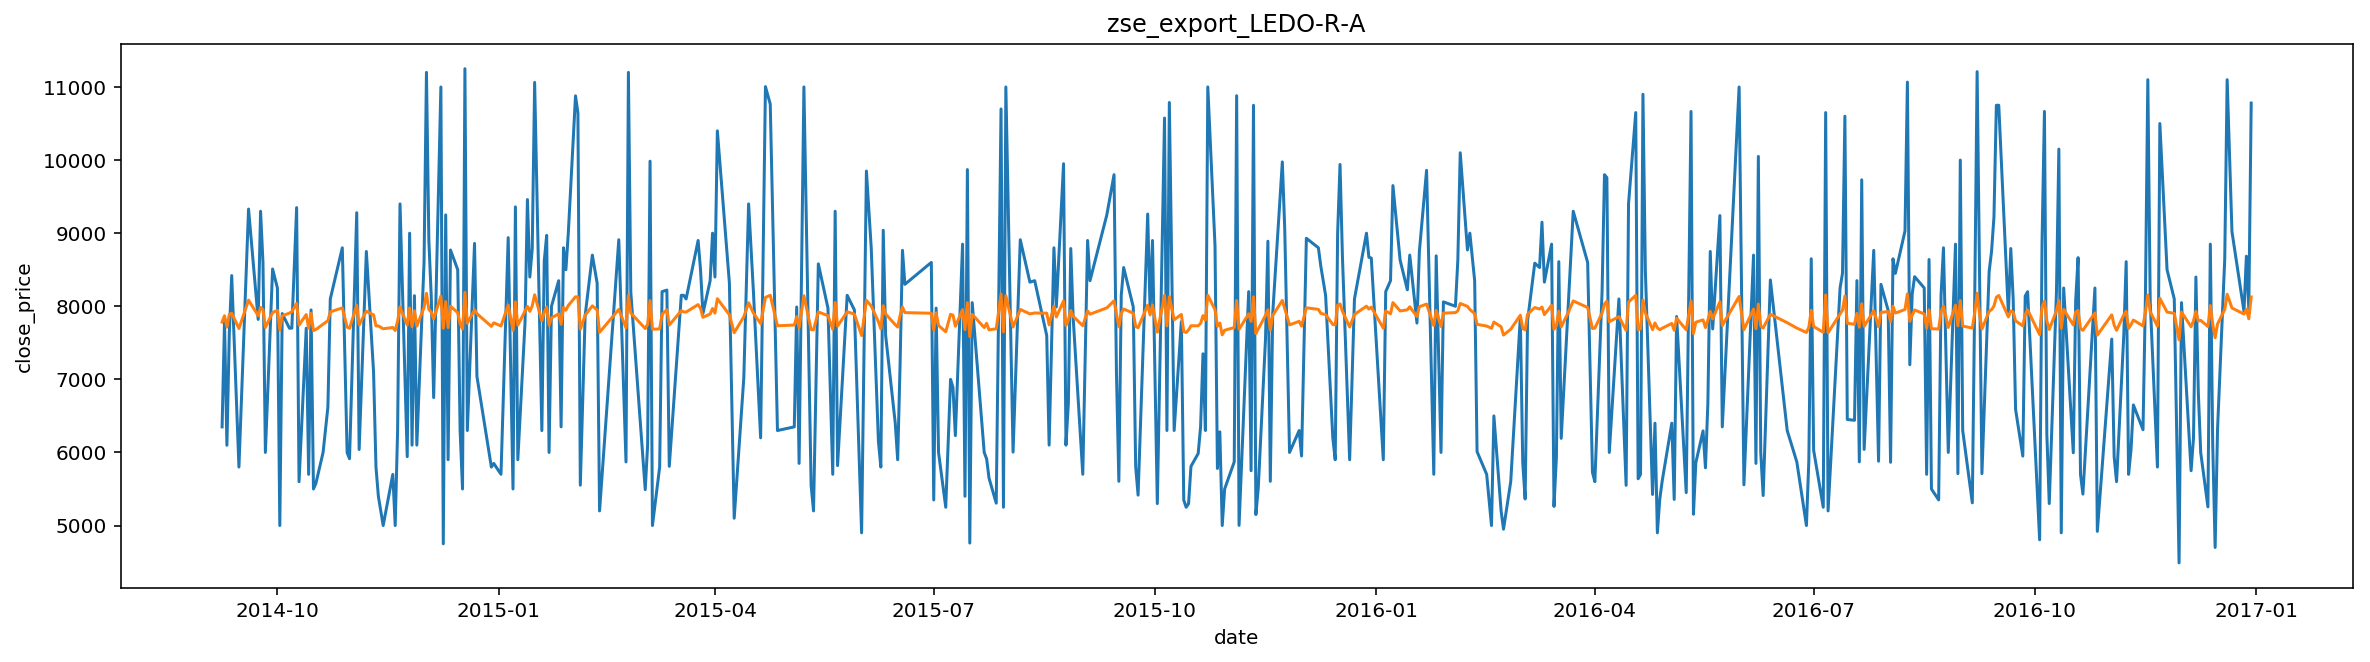

Done for: zse_export_LEDO-R-A
Analysis for: zse_export_RIVP-R-A


type: SVR;
        mse: 150.495923;
        Parameters: {'base_estimator__scoring': None, 'warm_start': False, 'base_estimator__verbose': 0, 'max_samples': 1.0, 'random_state': <mtrand.RandomState object at 0x7f63badd2f78>, 'base_estimator__estimator__coef0': 0.0, 'base_estimator__estimator__shrinking': True, 'n_jobs': 1, 'max_features': 1.0, 'base_estimator__estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'base_estimator__iid': True, 'bootstrap_features': True, 'base_estimator__estimator__degree': 3, 'base_estimator__estimator__kernel': 'rbf', 'base_estimator__error_score': 'raise', 'base_estimator__estimator__cache_size': 200, 'base_estimator__estimator__C': 1.0, 'base_estimator__pre_dispatch': '2*n_jobs', 'base_estimator__estimator__gamma': 'auto', 'base_estimator__estimator__verbose': False, 'verbose': 0, 'base_estimator__fit_params': {}, 'base_estimator__estimator__max_it

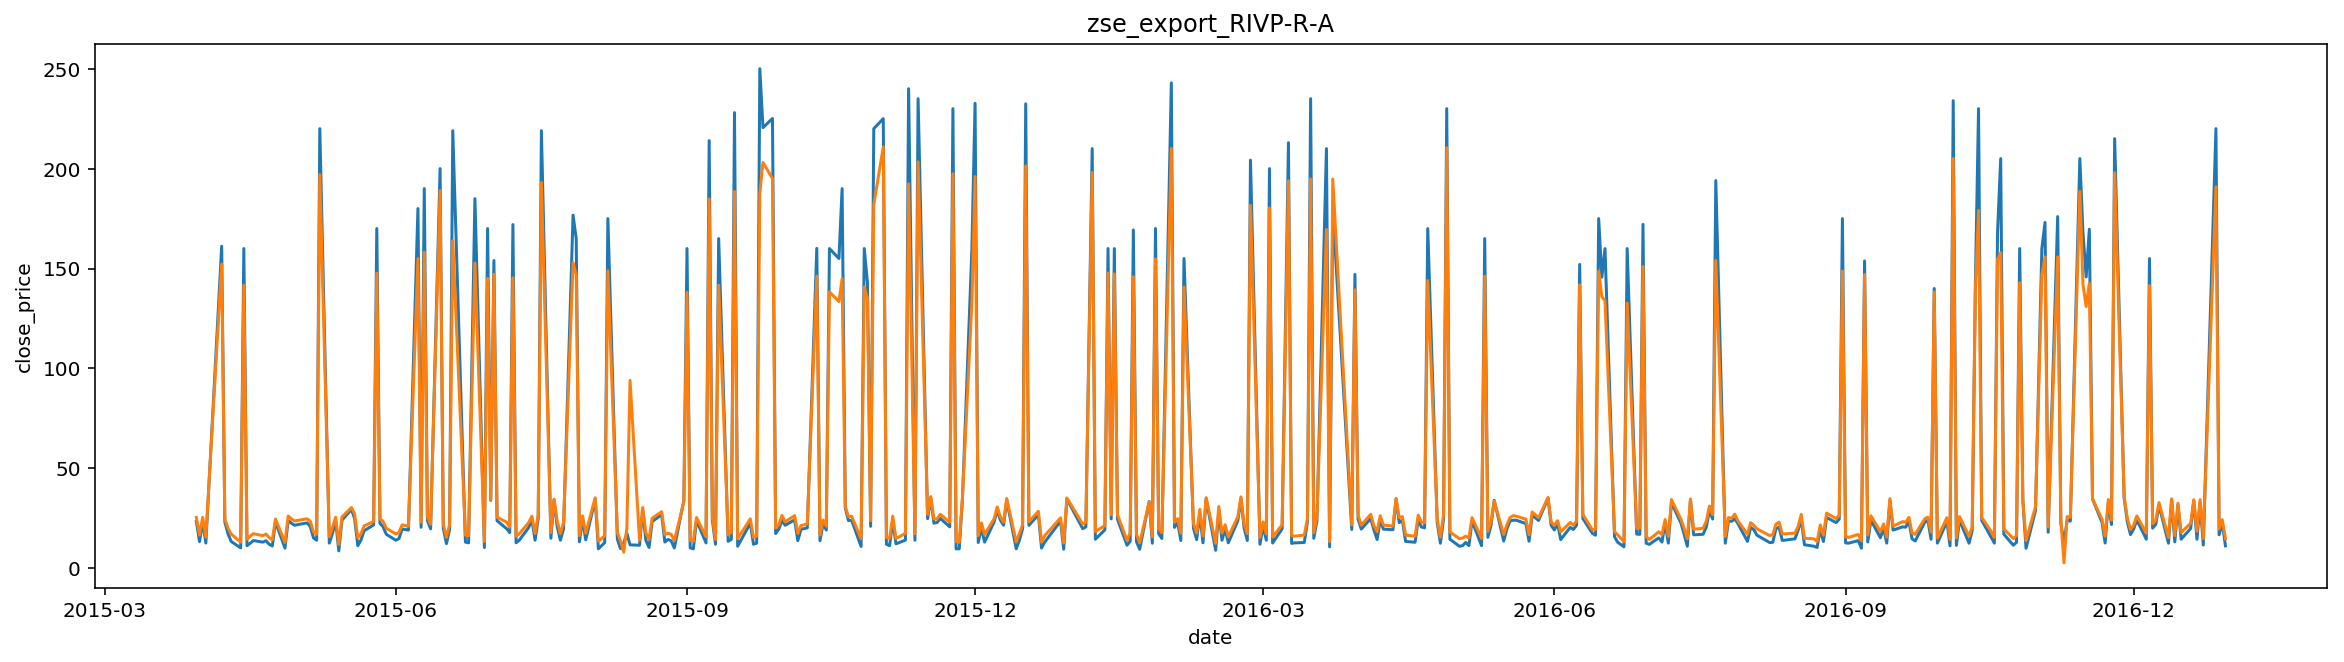

Done for: zse_export_RIVP-R-A
Analysis for: zse_export_HT-R-A


type: SVR;
        mse: 11.777483;
        Parameters: {'base_estimator__scoring': None, 'warm_start': False, 'base_estimator__verbose': 0, 'max_samples': 1.0, 'random_state': <mtrand.RandomState object at 0x7f63bad1f5a0>, 'base_estimator__estimator__coef0': 0.0, 'base_estimator__estimator__shrinking': True, 'n_jobs': 1, 'max_features': 1.0, 'base_estimator__estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'base_estimator__iid': True, 'bootstrap_features': False, 'base_estimator__estimator__degree': 3, 'base_estimator__estimator__kernel': 'rbf', 'base_estimator__error_score': 'raise', 'base_estimator__estimator__cache_size': 200, 'base_estimator__estimator__C': 1.0, 'base_estimator__pre_dispatch': '2*n_jobs', 'base_estimator__estimator__gamma': 'auto', 'base_estimator__estimator__verbose': False, 'verbose': 0, 'base_estimator__fit_params': {}, 'base_estimator__estimator__max_it

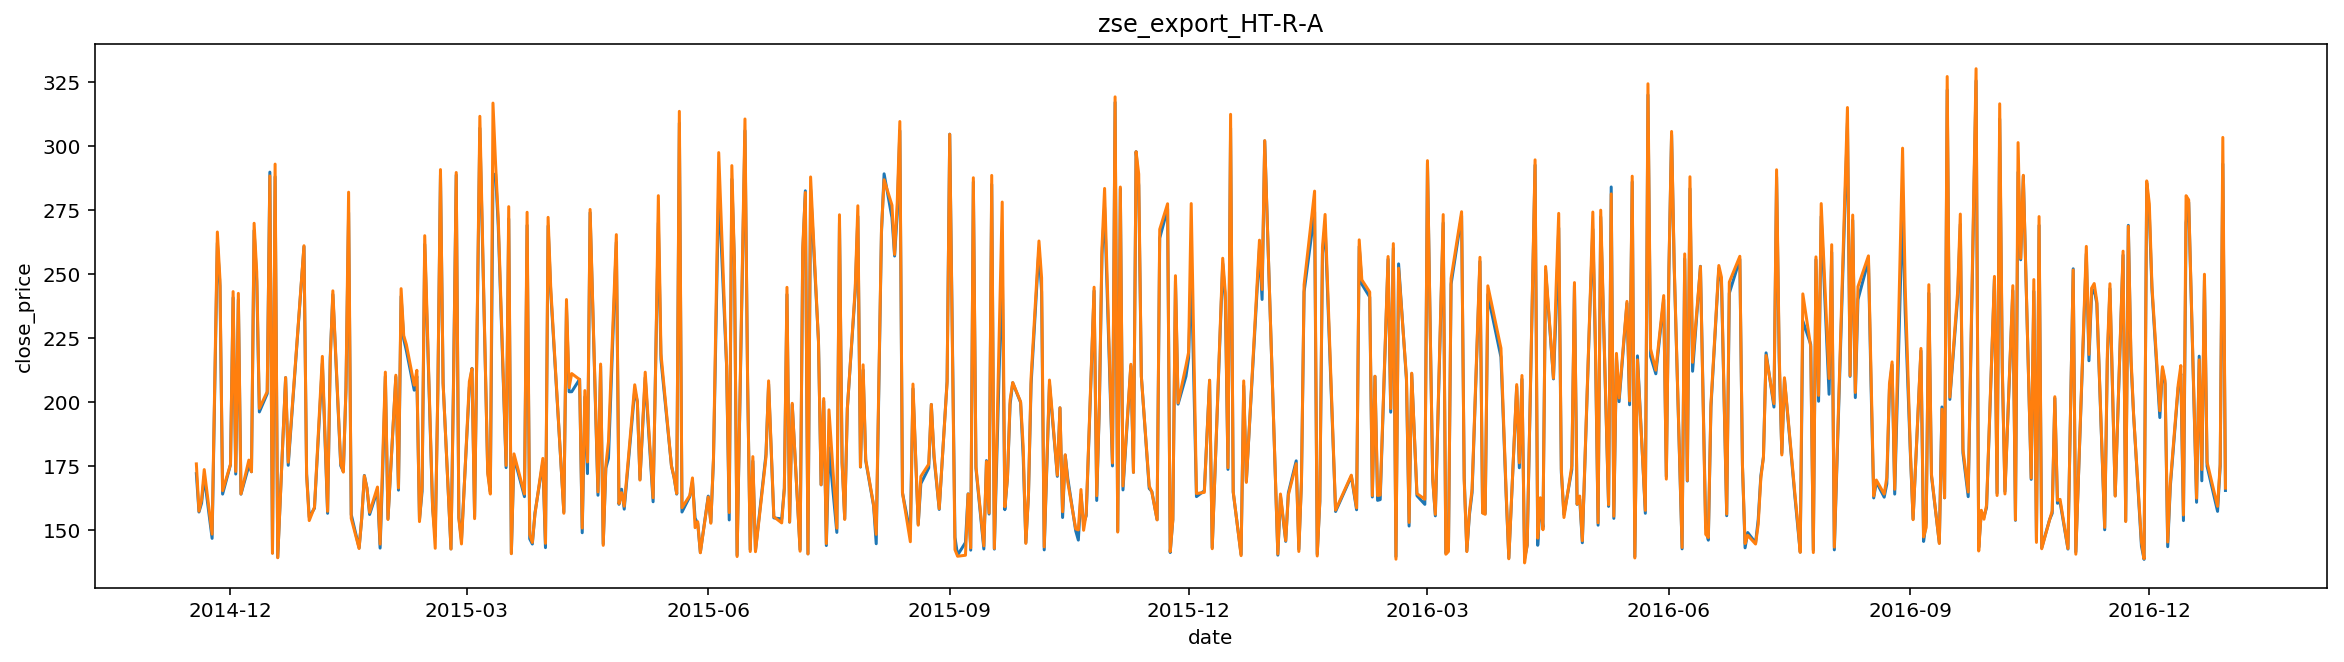

Done for: zse_export_HT-R-A
Analysis for: zse_export_ADRS-P-A


type: SVR;
        mse: 40.701054;
        Parameters: {'base_estimator__scoring': None, 'warm_start': False, 'base_estimator__verbose': 0, 'max_samples': 1.0, 'random_state': <mtrand.RandomState object at 0x7f63bad5ddc8>, 'base_estimator__estimator__coef0': 0.0, 'base_estimator__estimator__shrinking': True, 'n_jobs': 1, 'max_features': 1.0, 'base_estimator__estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'base_estimator__iid': True, 'bootstrap_features': False, 'base_estimator__estimator__degree': 3, 'base_estimator__estimator__kernel': 'rbf', 'base_estimator__error_score': 'raise', 'base_estimator__estimator__cache_size': 200, 'base_estimator__estimator__C': 1.0, 'base_estimator__pre_dispatch': '2*n_jobs', 'base_estimator__estimator__gamma': 'auto', 'base_estimator__estimator__verbose': False, 'verbose': 0, 'base_estimator__fit_params': {}, 'base_estimator__estimator__max_it

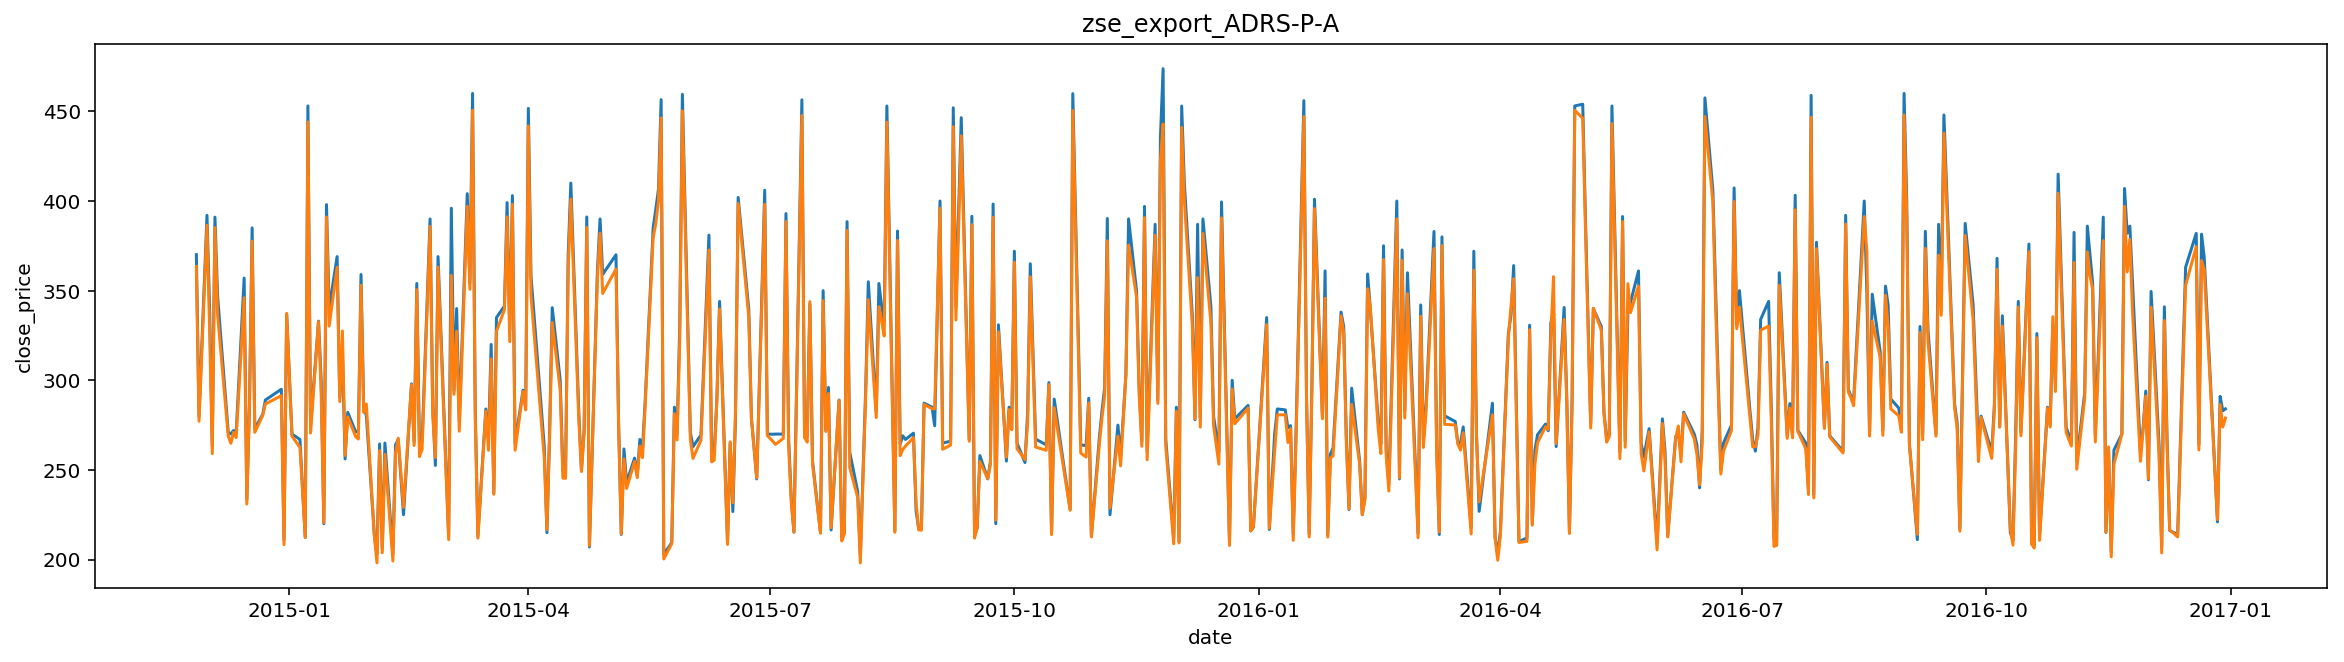

Done for: zse_export_ADRS-P-A
Analysis for: zse_export_KOEI-R-A


type: SVR;
        mse: 126.553739;
        Parameters: {'base_estimator__scoring': None, 'warm_start': False, 'base_estimator__verbose': 0, 'max_samples': 1.0, 'random_state': <mtrand.RandomState object at 0x7f63bacc5f78>, 'base_estimator__estimator__coef0': 0.0, 'base_estimator__estimator__shrinking': True, 'n_jobs': 1, 'max_features': 1.0, 'base_estimator__estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'base_estimator__iid': True, 'bootstrap_features': False, 'base_estimator__estimator__degree': 3, 'base_estimator__estimator__kernel': 'rbf', 'base_estimator__error_score': 'raise', 'base_estimator__estimator__cache_size': 200, 'base_estimator__estimator__C': 1.0, 'base_estimator__pre_dispatch': '2*n_jobs', 'base_estimator__estimator__gamma': 'auto', 'base_estimator__estimator__verbose': False, 'verbose': 0, 'base_estimator__fit_params': {}, 'base_estimator__estimator__max_i

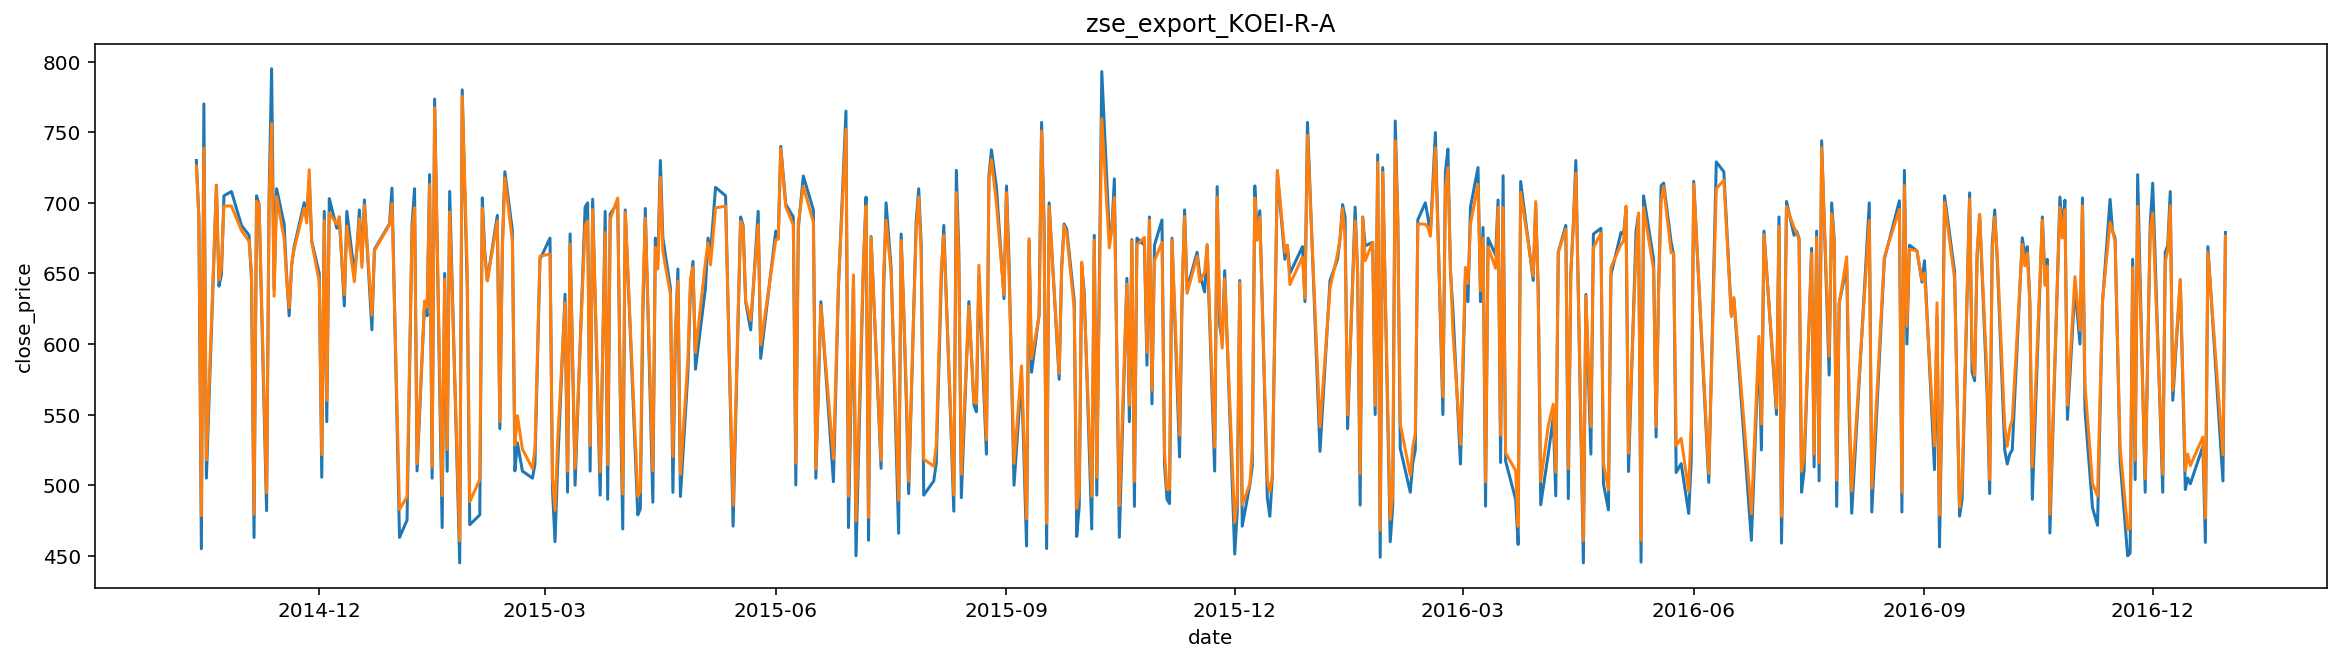

Done for: zse_export_KOEI-R-A
Analysis for: zse_export_MAIS-R-A


type: SVR;
        mse: 182.875166;
        Parameters: {'base_estimator__scoring': None, 'warm_start': False, 'base_estimator__verbose': 0, 'max_samples': 1.0, 'random_state': <mtrand.RandomState object at 0x7f63bac23b40>, 'base_estimator__estimator__coef0': 0.0, 'base_estimator__estimator__shrinking': True, 'n_jobs': 1, 'max_features': 1.0, 'base_estimator__estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'base_estimator__iid': True, 'bootstrap_features': False, 'base_estimator__estimator__degree': 3, 'base_estimator__estimator__kernel': 'rbf', 'base_estimator__error_score': 'raise', 'base_estimator__estimator__cache_size': 200, 'base_estimator__estimator__C': 1.0, 'base_estimator__pre_dispatch': '2*n_jobs', 'base_estimator__estimator__gamma': 'auto', 'base_estimator__estimator__verbose': False, 'verbose': 0, 'base_estimator__fit_params': {}, 'base_estimator__estimator__max_i

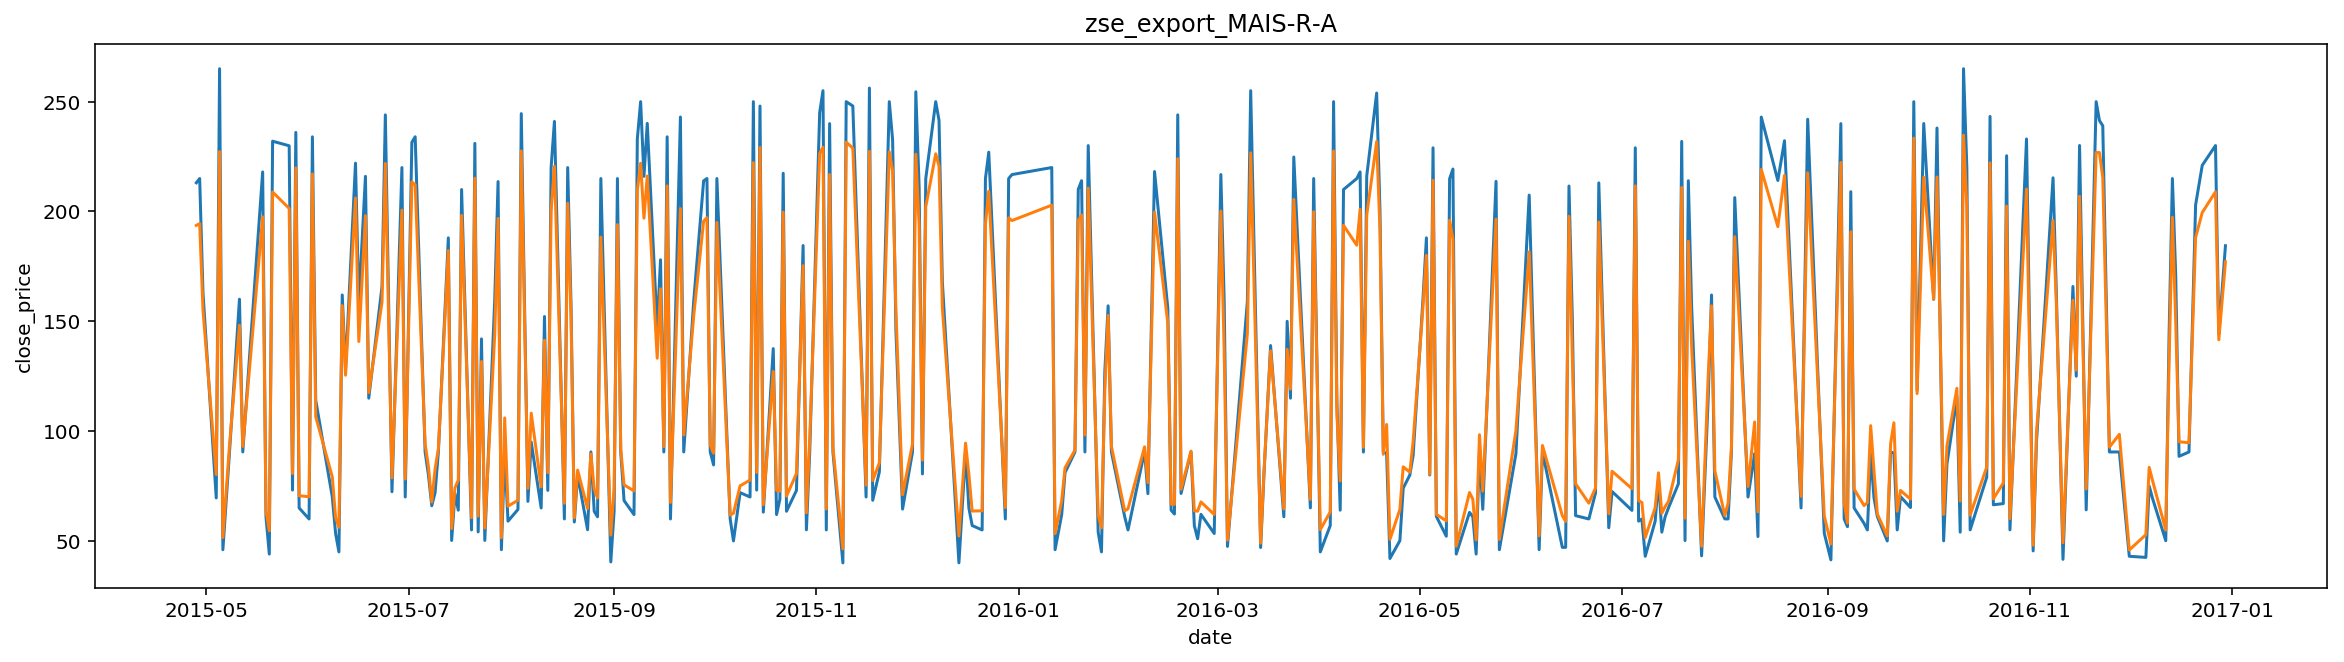

Done for: zse_export_MAIS-R-A
Analysis for: zse_export_PTKM-R-A


type: SVR;
        mse: 107.379470;
        Parameters: {'base_estimator__scoring': None, 'warm_start': False, 'base_estimator__verbose': 0, 'max_samples': 1.0, 'random_state': <mtrand.RandomState object at 0x7f63baca09d8>, 'base_estimator__estimator__coef0': 0.0, 'base_estimator__estimator__shrinking': True, 'n_jobs': 1, 'max_features': 1.0, 'base_estimator__estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'base_estimator__iid': True, 'bootstrap_features': False, 'base_estimator__estimator__degree': 3, 'base_estimator__estimator__kernel': 'rbf', 'base_estimator__error_score': 'raise', 'base_estimator__estimator__cache_size': 200, 'base_estimator__estimator__C': 1.0, 'base_estimator__pre_dispatch': '2*n_jobs', 'base_estimator__estimator__gamma': 'auto', 'base_estimator__estimator__verbose': False, 'verbose': 0, 'base_estimator__fit_params': {}, 'base_estimator__estimator__max_i

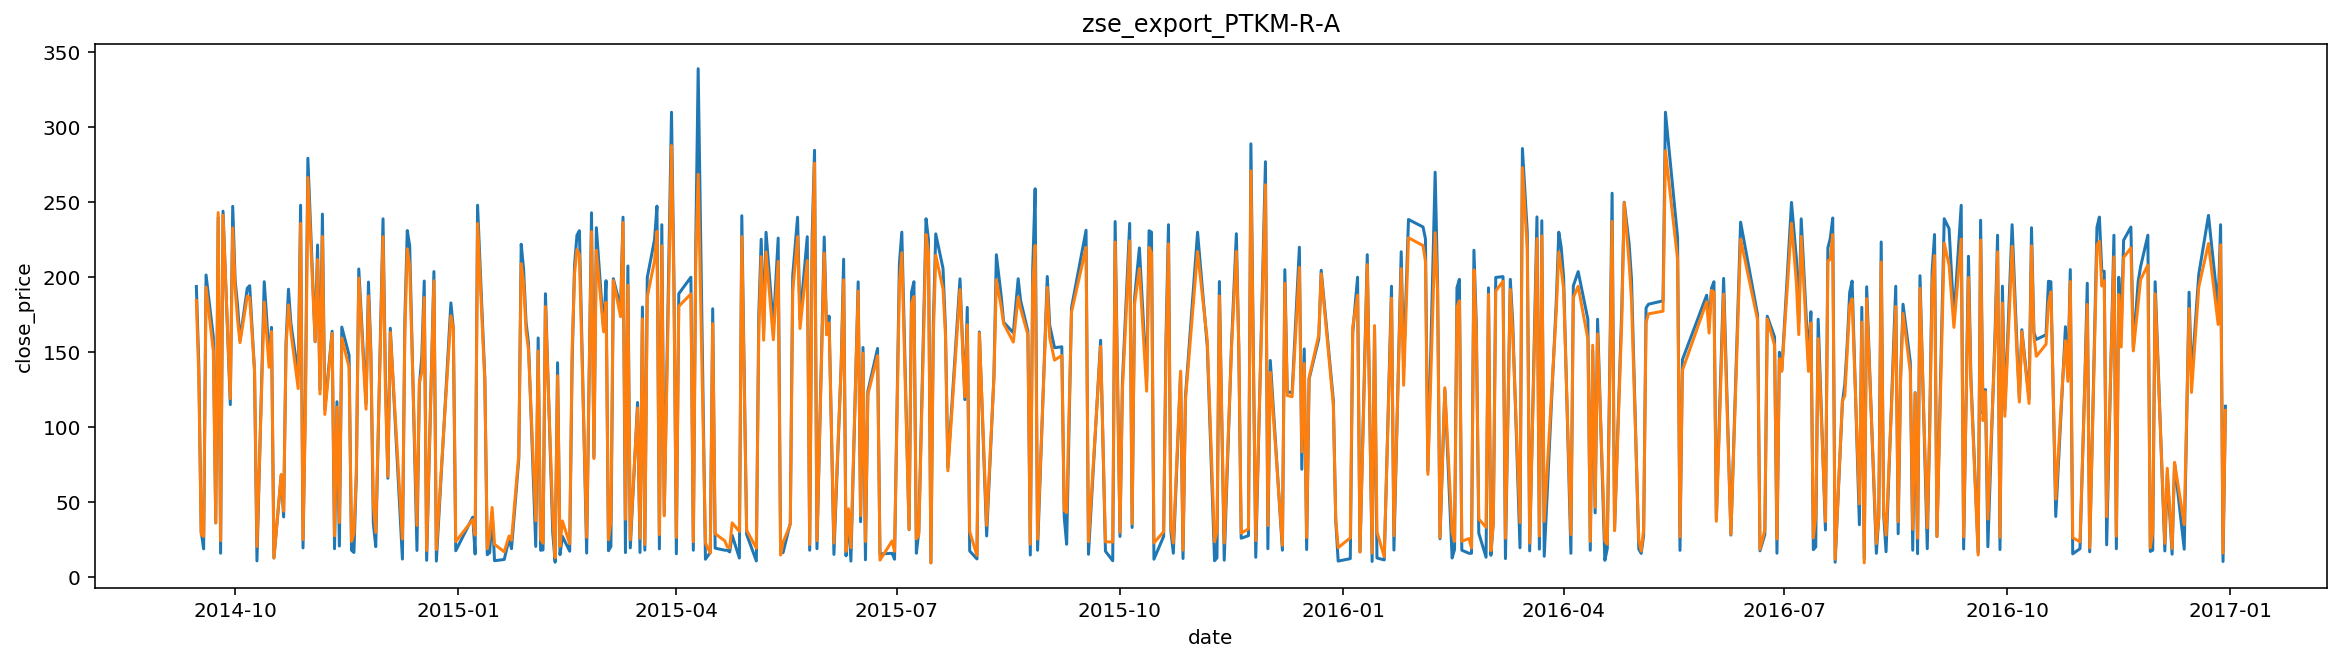

Done for: zse_export_PTKM-R-A
Analysis for: zse_export_VART-R-1


type: SVR;
        mse: 0.568326;
        Parameters: {'base_estimator__scoring': None, 'warm_start': False, 'base_estimator__verbose': 0, 'max_samples': 1.0, 'random_state': <mtrand.RandomState object at 0x7f63bb7bb5e8>, 'base_estimator__estimator__coef0': 0.0, 'base_estimator__estimator__shrinking': True, 'n_jobs': 1, 'max_features': 1.0, 'base_estimator__estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'base_estimator__iid': True, 'bootstrap_features': False, 'base_estimator__estimator__degree': 3, 'base_estimator__estimator__kernel': 'rbf', 'base_estimator__error_score': 'raise', 'base_estimator__estimator__cache_size': 200, 'base_estimator__estimator__C': 1.0, 'base_estimator__pre_dispatch': '2*n_jobs', 'base_estimator__estimator__gamma': 'auto', 'base_estimator__estimator__verbose': False, 'verbose': 0, 'base_estimator__fit_params': {}, 'base_estimator__estimator__max_ite

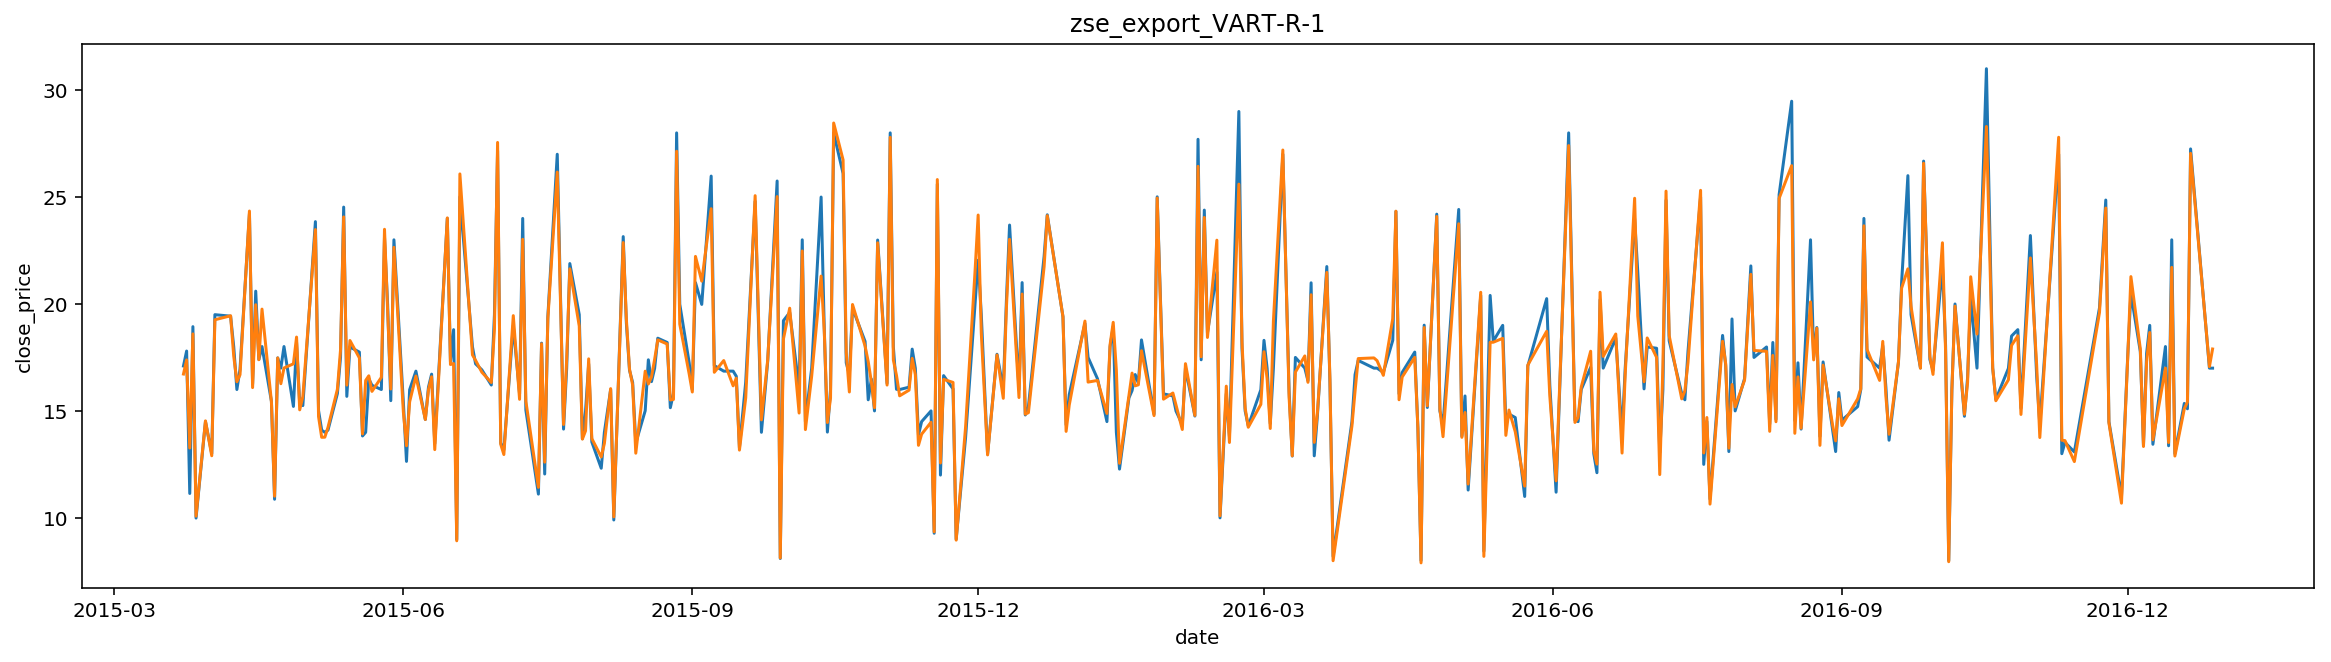

Done for: zse_export_VART-R-1
Analysis for: zse_export_LRH-R-A


type: SVR;
        mse: 641399.780218;
        Parameters: {'base_estimator__scoring': None, 'warm_start': False, 'base_estimator__verbose': 0, 'max_samples': 1.0, 'random_state': <mtrand.RandomState object at 0x7f63bb63e2d0>, 'base_estimator__estimator__coef0': 0.0, 'base_estimator__estimator__shrinking': True, 'n_jobs': 1, 'max_features': 1.0, 'base_estimator__estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'base_estimator__iid': True, 'bootstrap_features': True, 'base_estimator__estimator__degree': 3, 'base_estimator__estimator__kernel': 'rbf', 'base_estimator__error_score': 'raise', 'base_estimator__estimator__cache_size': 200, 'base_estimator__estimator__C': 1.0, 'base_estimator__pre_dispatch': '2*n_jobs', 'base_estimator__estimator__gamma': 'auto', 'base_estimator__estimator__verbose': False, 'verbose': 0, 'base_estimator__fit_params': {}, 'base_estimator__estimator__max

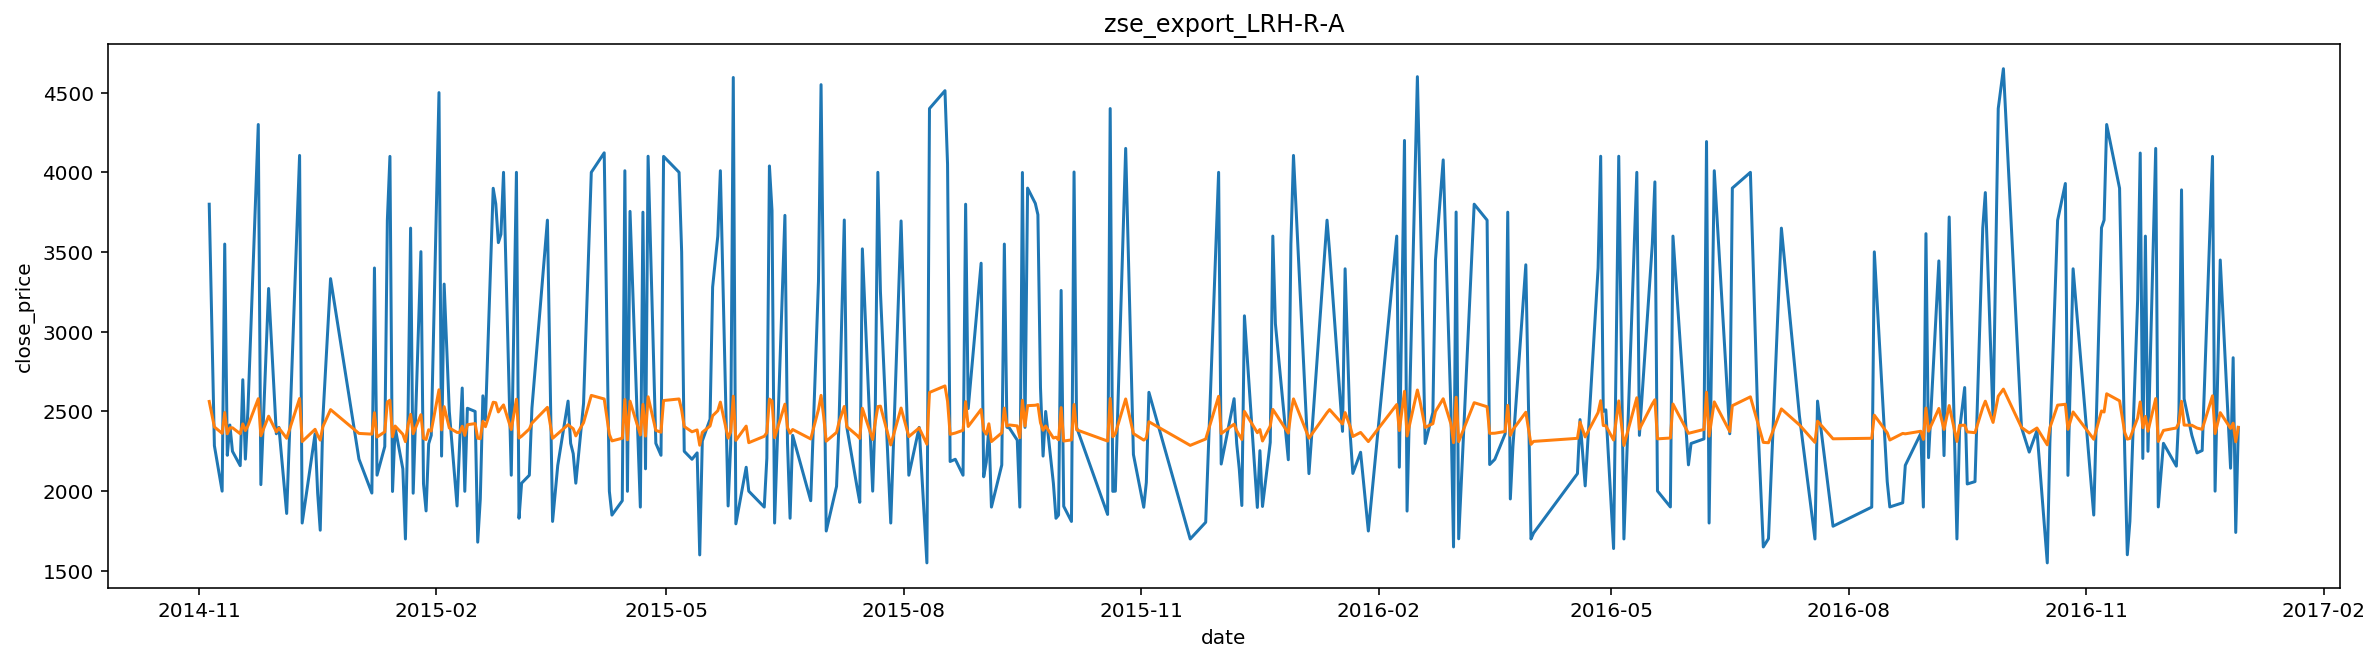

Done for: zse_export_LRH-R-A
Analysis for: zse_export_DDJH-R-A


type: SVR;
        mse: 2.036863;
        Parameters: {'base_estimator__scoring': None, 'warm_start': False, 'base_estimator__verbose': 0, 'max_samples': 0.5, 'random_state': <mtrand.RandomState object at 0x7f63bb8200d8>, 'base_estimator__estimator__coef0': 0.0, 'base_estimator__estimator__shrinking': True, 'n_jobs': 1, 'max_features': 1.0, 'base_estimator__estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'base_estimator__iid': True, 'bootstrap_features': False, 'base_estimator__estimator__degree': 3, 'base_estimator__estimator__kernel': 'rbf', 'base_estimator__error_score': 'raise', 'base_estimator__estimator__cache_size': 200, 'base_estimator__estimator__C': 1.0, 'base_estimator__pre_dispatch': '2*n_jobs', 'base_estimator__estimator__gamma': 'auto', 'base_estimator__estimator__verbose': False, 'verbose': 0, 'base_estimator__fit_params': {}, 'base_estimator__estimator__max_ite

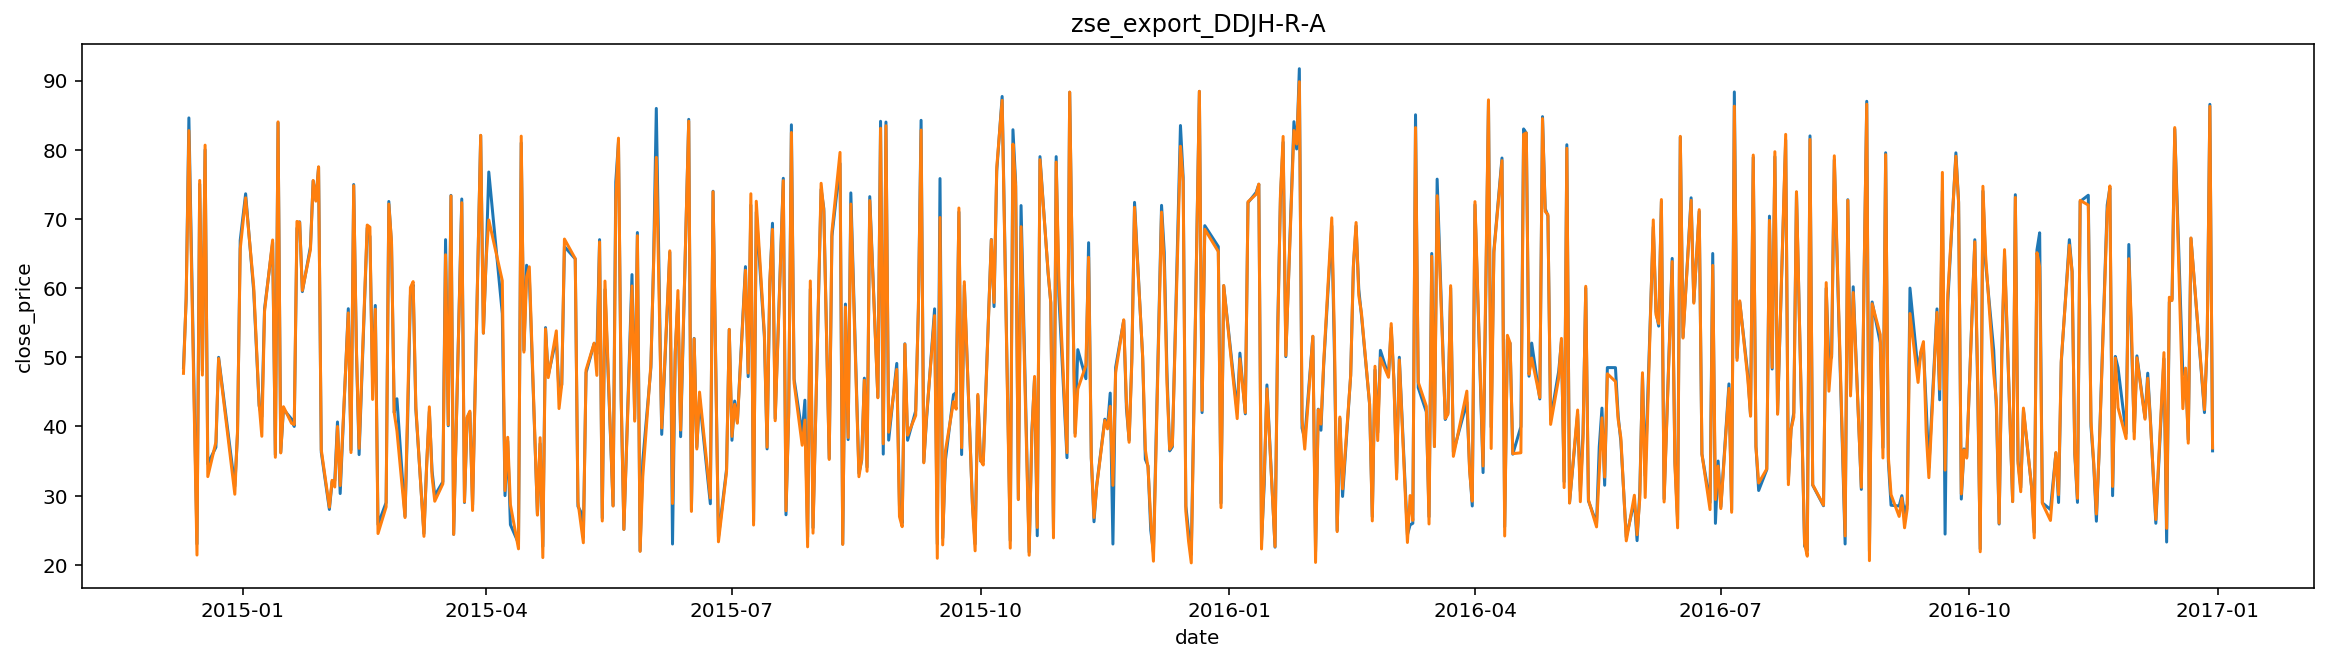

Done for: zse_export_DDJH-R-A
Analysis for: zse_export_THNK-R-A


type: SVR;
        mse: 66540.758569;
        Parameters: {'base_estimator__scoring': None, 'warm_start': False, 'base_estimator__verbose': 0, 'max_samples': 1.0, 'random_state': <mtrand.RandomState object at 0x7f63baccd360>, 'base_estimator__estimator__coef0': 0.0, 'base_estimator__estimator__shrinking': True, 'n_jobs': 1, 'max_features': 1.0, 'base_estimator__estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'base_estimator__iid': True, 'bootstrap_features': True, 'base_estimator__estimator__degree': 3, 'base_estimator__estimator__kernel': 'rbf', 'base_estimator__error_score': 'raise', 'base_estimator__estimator__cache_size': 200, 'base_estimator__estimator__C': 1.0, 'base_estimator__pre_dispatch': '2*n_jobs', 'base_estimator__estimator__gamma': 'auto', 'base_estimator__estimator__verbose': False, 'verbose': 0, 'base_estimator__fit_params': {}, 'base_estimator__estimator__max_

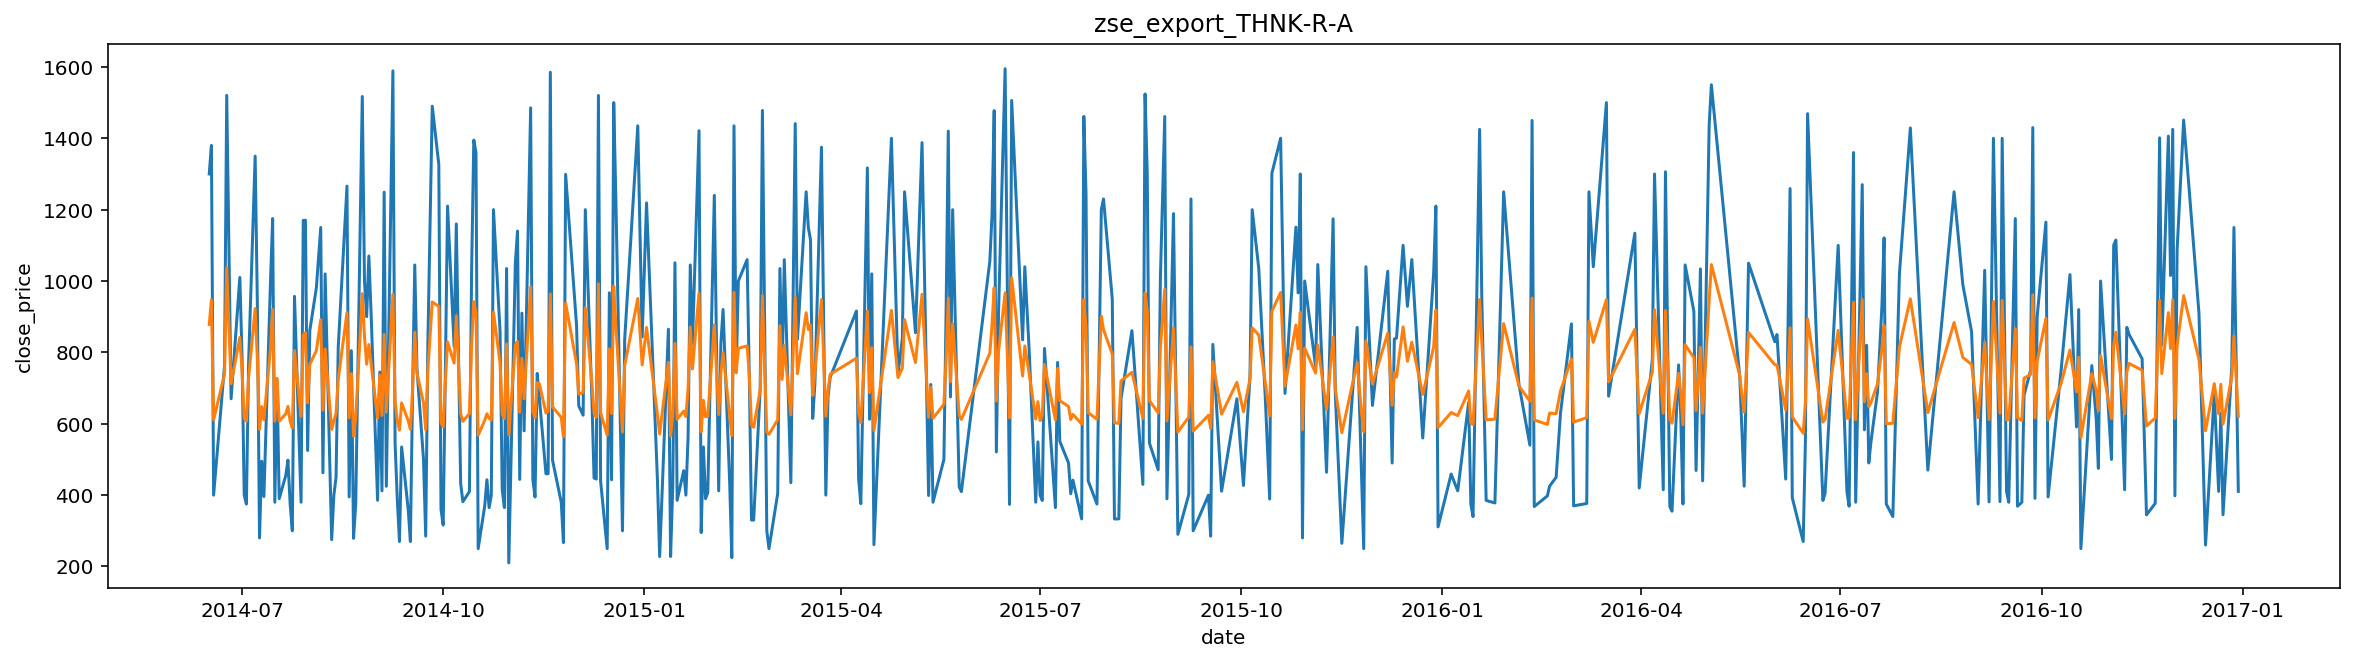

Done for: zse_export_THNK-R-A
Analysis for: zse_export_DLKV-R-A


type: SVR;
        mse: 1090.362119;
        Parameters: {'base_estimator__scoring': None, 'warm_start': False, 'base_estimator__verbose': 0, 'max_samples': 1.0, 'random_state': <mtrand.RandomState object at 0x7f63bacea318>, 'base_estimator__estimator__coef0': 0.0, 'base_estimator__estimator__shrinking': True, 'n_jobs': 1, 'max_features': 1.0, 'base_estimator__estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'base_estimator__iid': True, 'bootstrap_features': True, 'base_estimator__estimator__degree': 3, 'base_estimator__estimator__kernel': 'rbf', 'base_estimator__error_score': 'raise', 'base_estimator__estimator__cache_size': 200, 'base_estimator__estimator__C': 1.0, 'base_estimator__pre_dispatch': '2*n_jobs', 'base_estimator__estimator__gamma': 'auto', 'base_estimator__estimator__verbose': False, 'verbose': 0, 'base_estimator__fit_params': {}, 'base_estimator__estimator__max_i

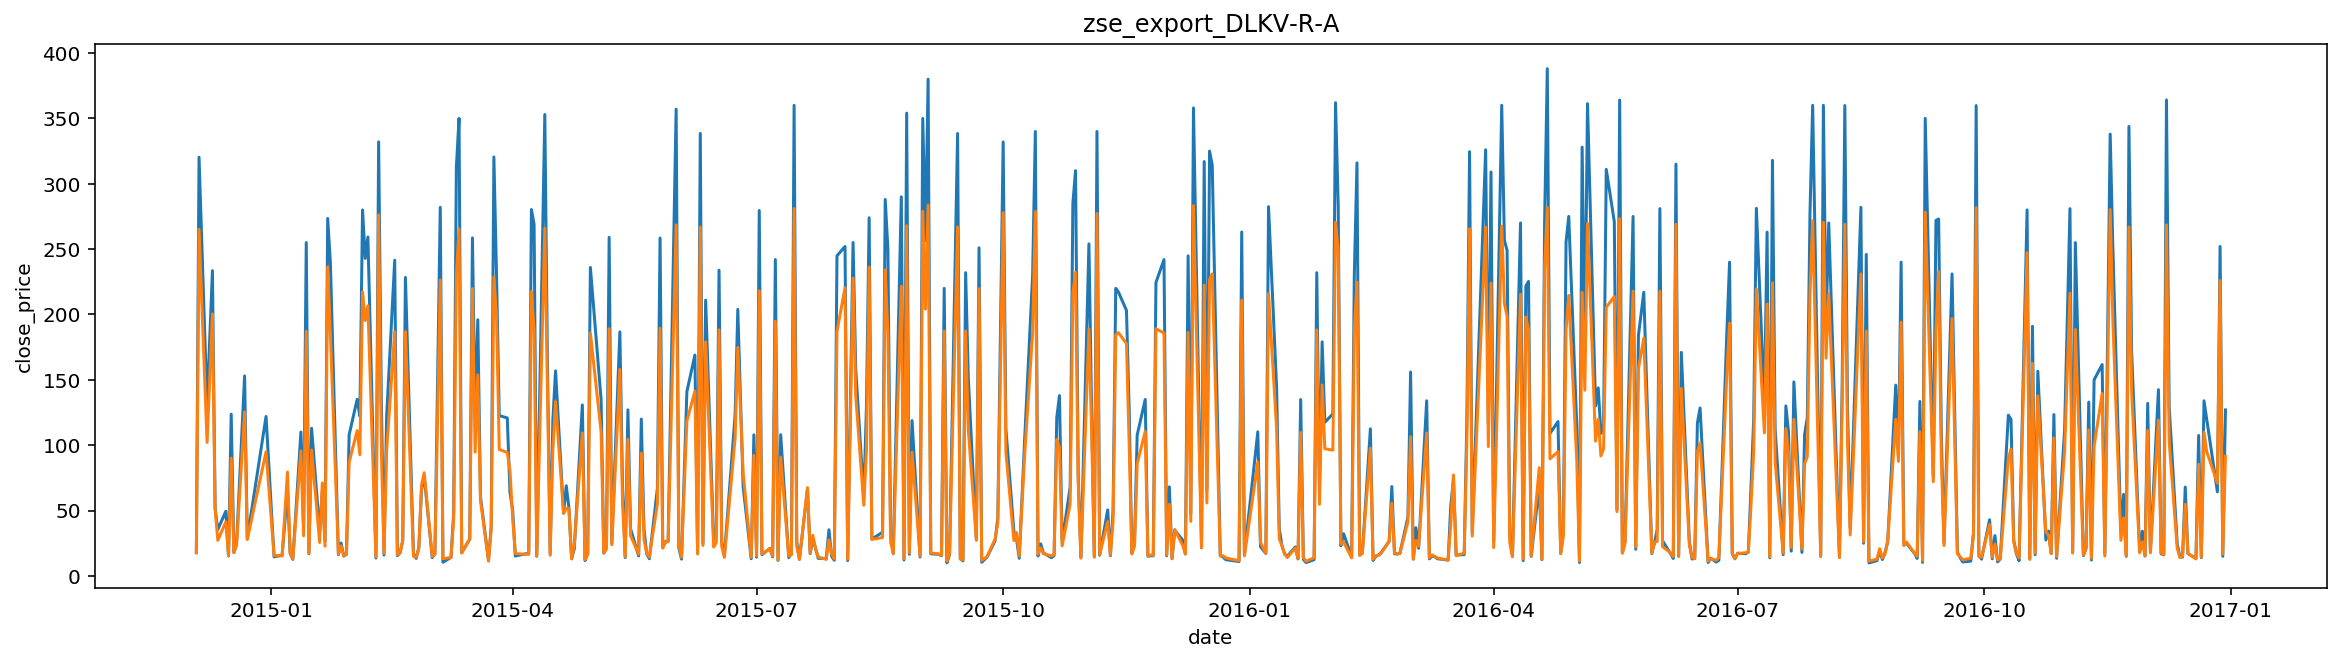

Done for: zse_export_DLKV-R-A
Analysis for: zse_export_ADPL-R-A


type: SVR;
        mse: 2.939988;
        Parameters: {'base_estimator__scoring': None, 'warm_start': False, 'base_estimator__verbose': 0, 'max_samples': 1.0, 'random_state': <mtrand.RandomState object at 0x7f63bad455a0>, 'base_estimator__estimator__coef0': 0.0, 'base_estimator__estimator__shrinking': True, 'n_jobs': 1, 'max_features': 1.0, 'base_estimator__estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'base_estimator__iid': True, 'bootstrap_features': False, 'base_estimator__estimator__degree': 3, 'base_estimator__estimator__kernel': 'rbf', 'base_estimator__error_score': 'raise', 'base_estimator__estimator__cache_size': 200, 'base_estimator__estimator__C': 1.0, 'base_estimator__pre_dispatch': '2*n_jobs', 'base_estimator__estimator__gamma': 'auto', 'base_estimator__estimator__verbose': False, 'verbose': 0, 'base_estimator__fit_params': {}, 'base_estimator__estimator__max_ite

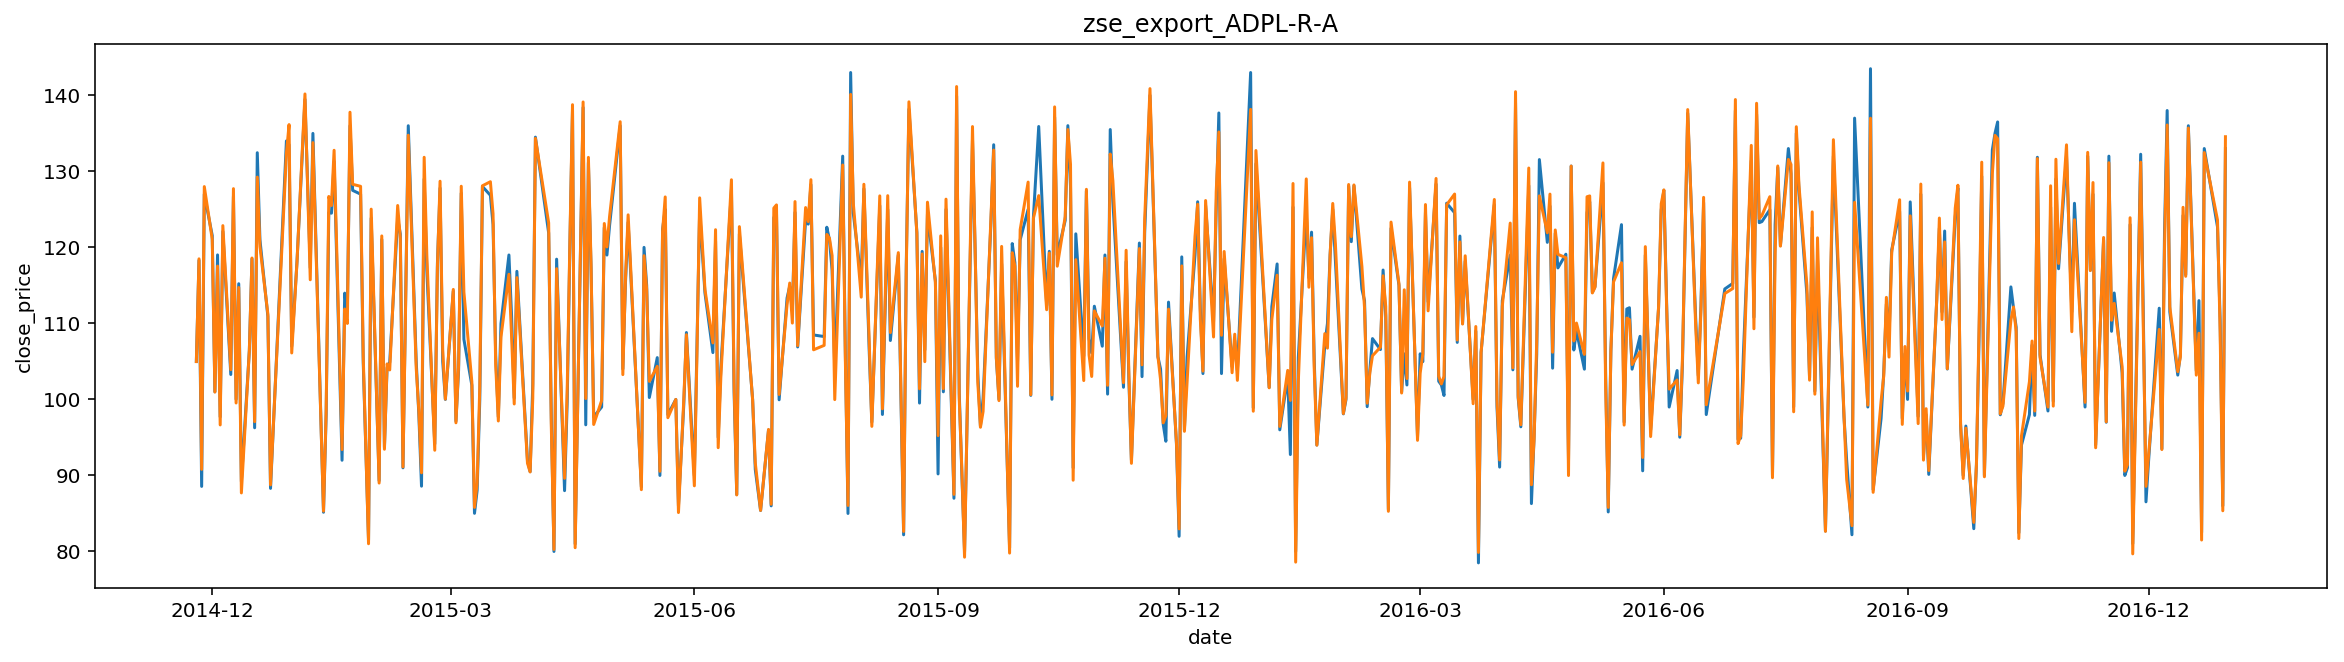

Done for: zse_export_ADPL-R-A
Analysis for: zse_export_ATGR-R-A


type: SVR;
        mse: 1836.472627;
        Parameters: {'base_estimator__scoring': None, 'warm_start': False, 'base_estimator__verbose': 0, 'max_samples': 1.0, 'random_state': <mtrand.RandomState object at 0x7f63bad73360>, 'base_estimator__estimator__coef0': 0.0, 'base_estimator__estimator__shrinking': True, 'n_jobs': 1, 'max_features': 1.0, 'base_estimator__estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'base_estimator__iid': True, 'bootstrap_features': True, 'base_estimator__estimator__degree': 3, 'base_estimator__estimator__kernel': 'rbf', 'base_estimator__error_score': 'raise', 'base_estimator__estimator__cache_size': 200, 'base_estimator__estimator__C': 1.0, 'base_estimator__pre_dispatch': '2*n_jobs', 'base_estimator__estimator__gamma': 'auto', 'base_estimator__estimator__verbose': False, 'verbose': 0, 'base_estimator__fit_params': {}, 'base_estimator__estimator__max_i

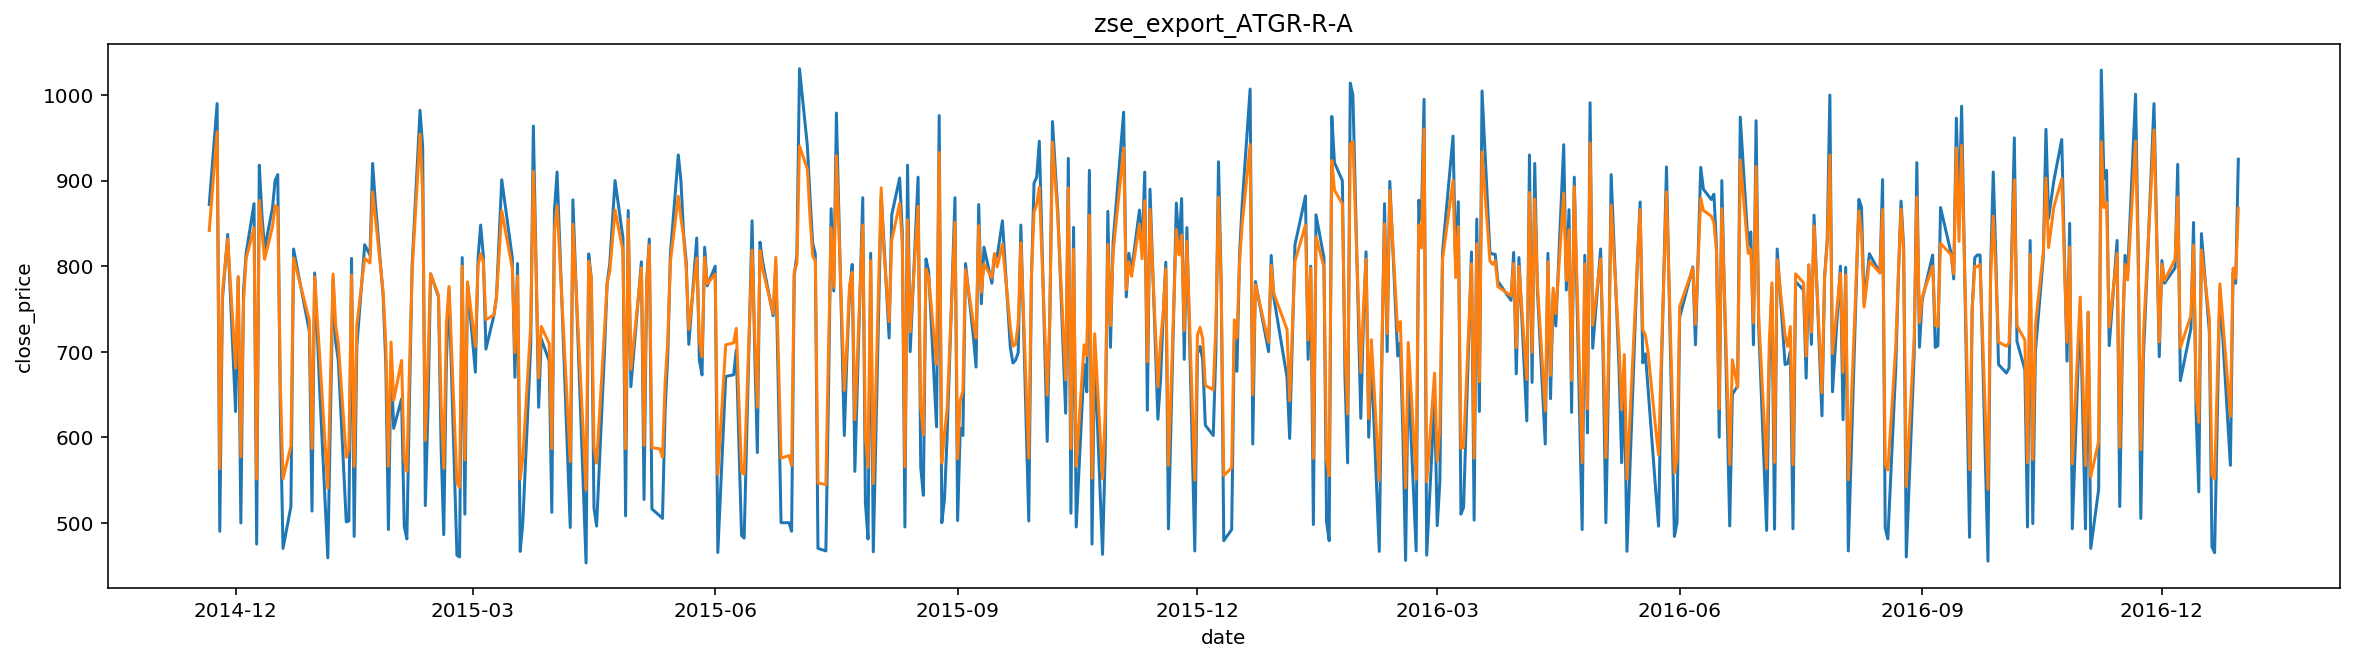

Done for: zse_export_ATGR-R-A
Analysis for: zse_export_INA-R-A


type: SVR;
        mse: 548946.305236;
        Parameters: {'base_estimator__scoring': None, 'warm_start': False, 'base_estimator__verbose': 0, 'max_samples': 1.0, 'random_state': <mtrand.RandomState object at 0x7f63bbf9d2d0>, 'base_estimator__estimator__coef0': 0.0, 'base_estimator__estimator__shrinking': True, 'n_jobs': 1, 'max_features': 1.0, 'base_estimator__estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'base_estimator__iid': True, 'bootstrap_features': True, 'base_estimator__estimator__degree': 3, 'base_estimator__estimator__kernel': 'rbf', 'base_estimator__error_score': 'raise', 'base_estimator__estimator__cache_size': 200, 'base_estimator__estimator__C': 1.0, 'base_estimator__pre_dispatch': '2*n_jobs', 'base_estimator__estimator__gamma': 'auto', 'base_estimator__estimator__verbose': False, 'verbose': 0, 'base_estimator__fit_params': {}, 'base_estimator__estimator__max

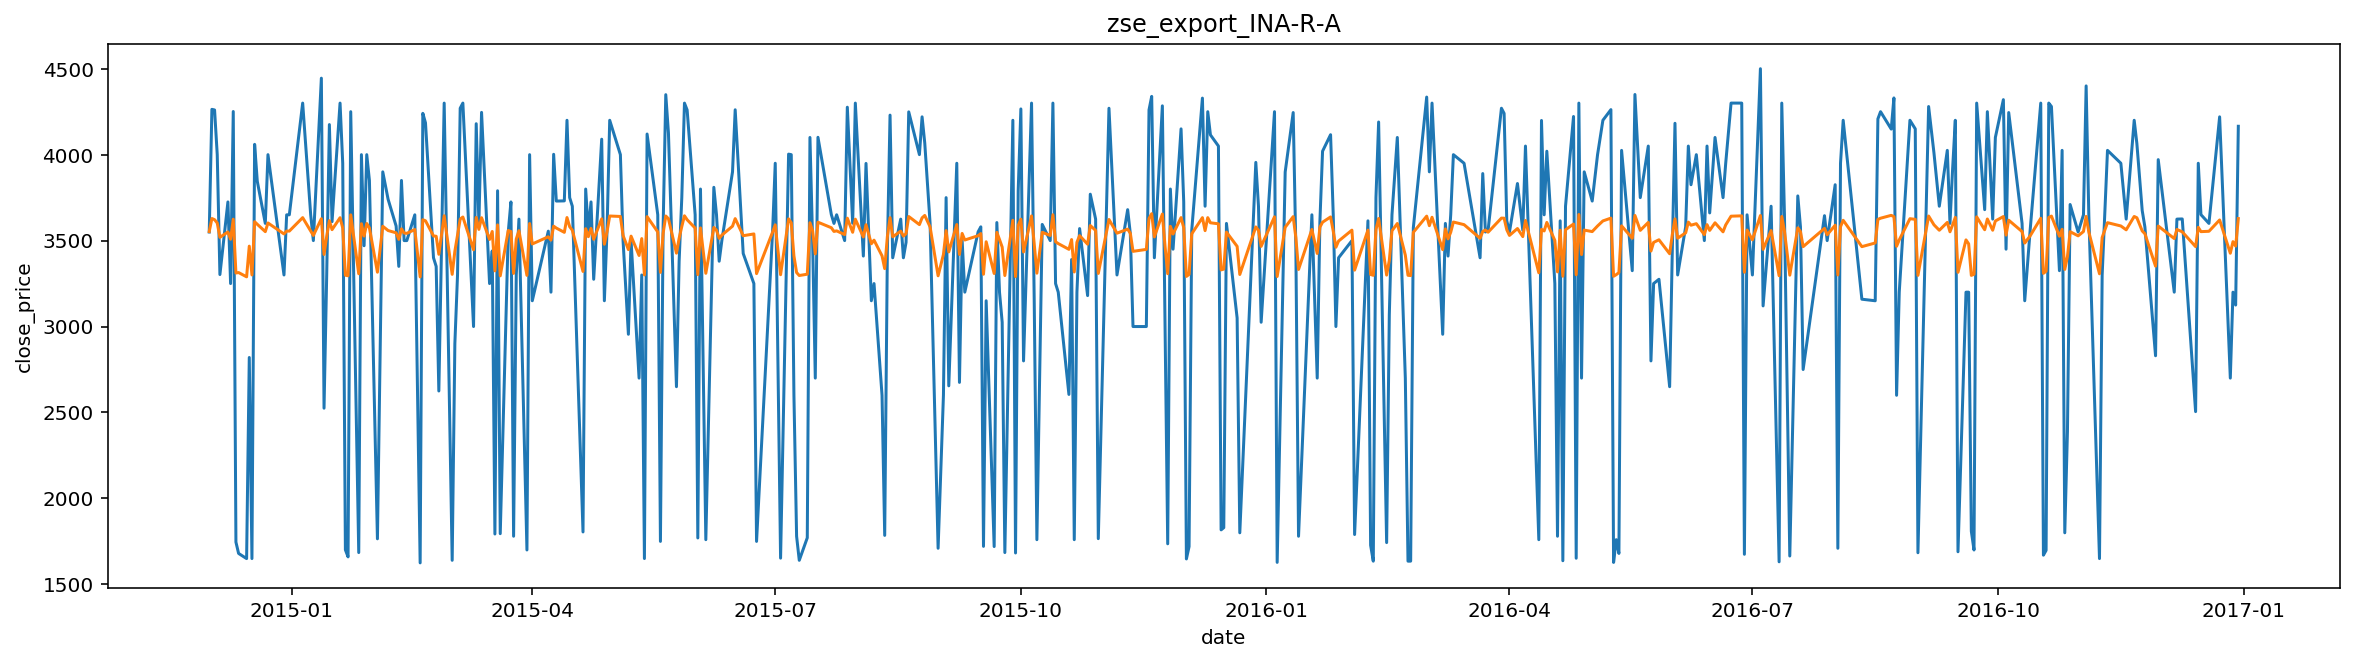

Done for: zse_export_INA-R-A
Analysis for: zse_export_VLEN-R-B


type: SVR;
        mse: 0.288359;
        Parameters: {'base_estimator__scoring': None, 'warm_start': False, 'base_estimator__verbose': 0, 'max_samples': 0.5, 'random_state': <mtrand.RandomState object at 0x7f63bad3c0d8>, 'base_estimator__estimator__coef0': 0.0, 'base_estimator__estimator__shrinking': True, 'n_jobs': 1, 'max_features': 0.5, 'base_estimator__estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'base_estimator__iid': True, 'bootstrap_features': False, 'base_estimator__estimator__degree': 3, 'base_estimator__estimator__kernel': 'rbf', 'base_estimator__error_score': 'raise', 'base_estimator__estimator__cache_size': 200, 'base_estimator__estimator__C': 1.0, 'base_estimator__pre_dispatch': '2*n_jobs', 'base_estimator__estimator__gamma': 'auto', 'base_estimator__estimator__verbose': False, 'verbose': 0, 'base_estimator__fit_params': {}, 'base_estimator__estimator__max_ite

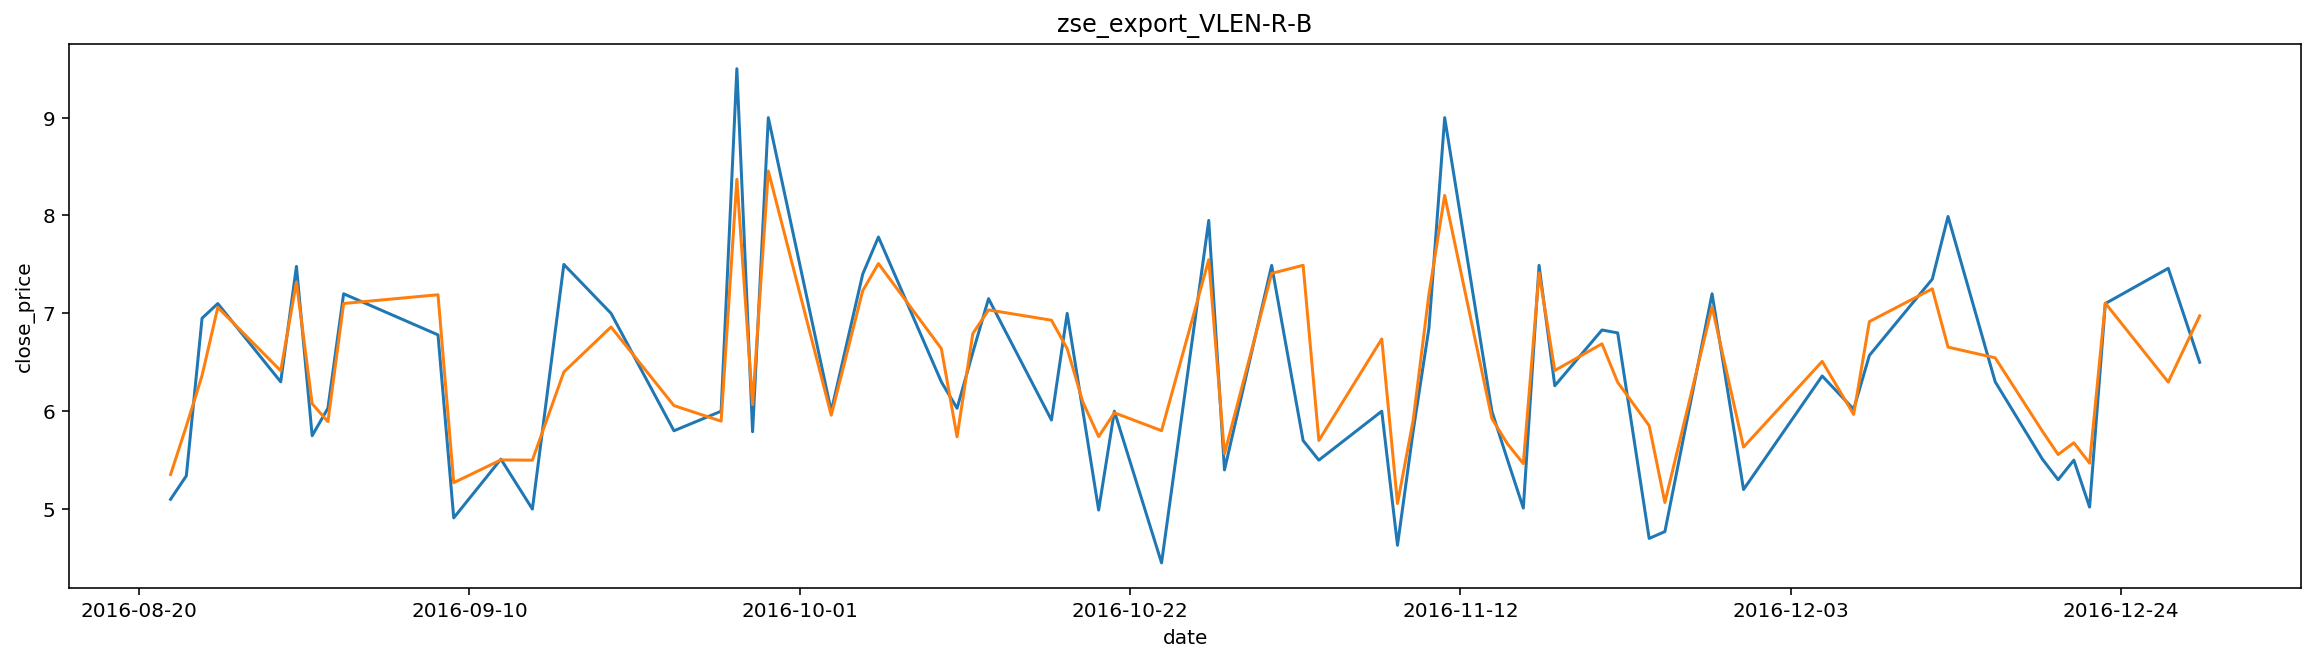

Done for: zse_export_VLEN-R-B
Analysis for: zse_export_ERNT-R-A


type: SVR;
        mse: 5319.951161;
        Parameters: {'base_estimator__scoring': None, 'warm_start': False, 'base_estimator__verbose': 0, 'max_samples': 1.0, 'random_state': <mtrand.RandomState object at 0x7f63baac0480>, 'base_estimator__estimator__coef0': 0.0, 'base_estimator__estimator__shrinking': True, 'n_jobs': 1, 'max_features': 1.0, 'base_estimator__estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'base_estimator__iid': True, 'bootstrap_features': True, 'base_estimator__estimator__degree': 3, 'base_estimator__estimator__kernel': 'rbf', 'base_estimator__error_score': 'raise', 'base_estimator__estimator__cache_size': 200, 'base_estimator__estimator__C': 1.0, 'base_estimator__pre_dispatch': '2*n_jobs', 'base_estimator__estimator__gamma': 'auto', 'base_estimator__estimator__verbose': False, 'verbose': 0, 'base_estimator__fit_params': {}, 'base_estimator__estimator__max_i

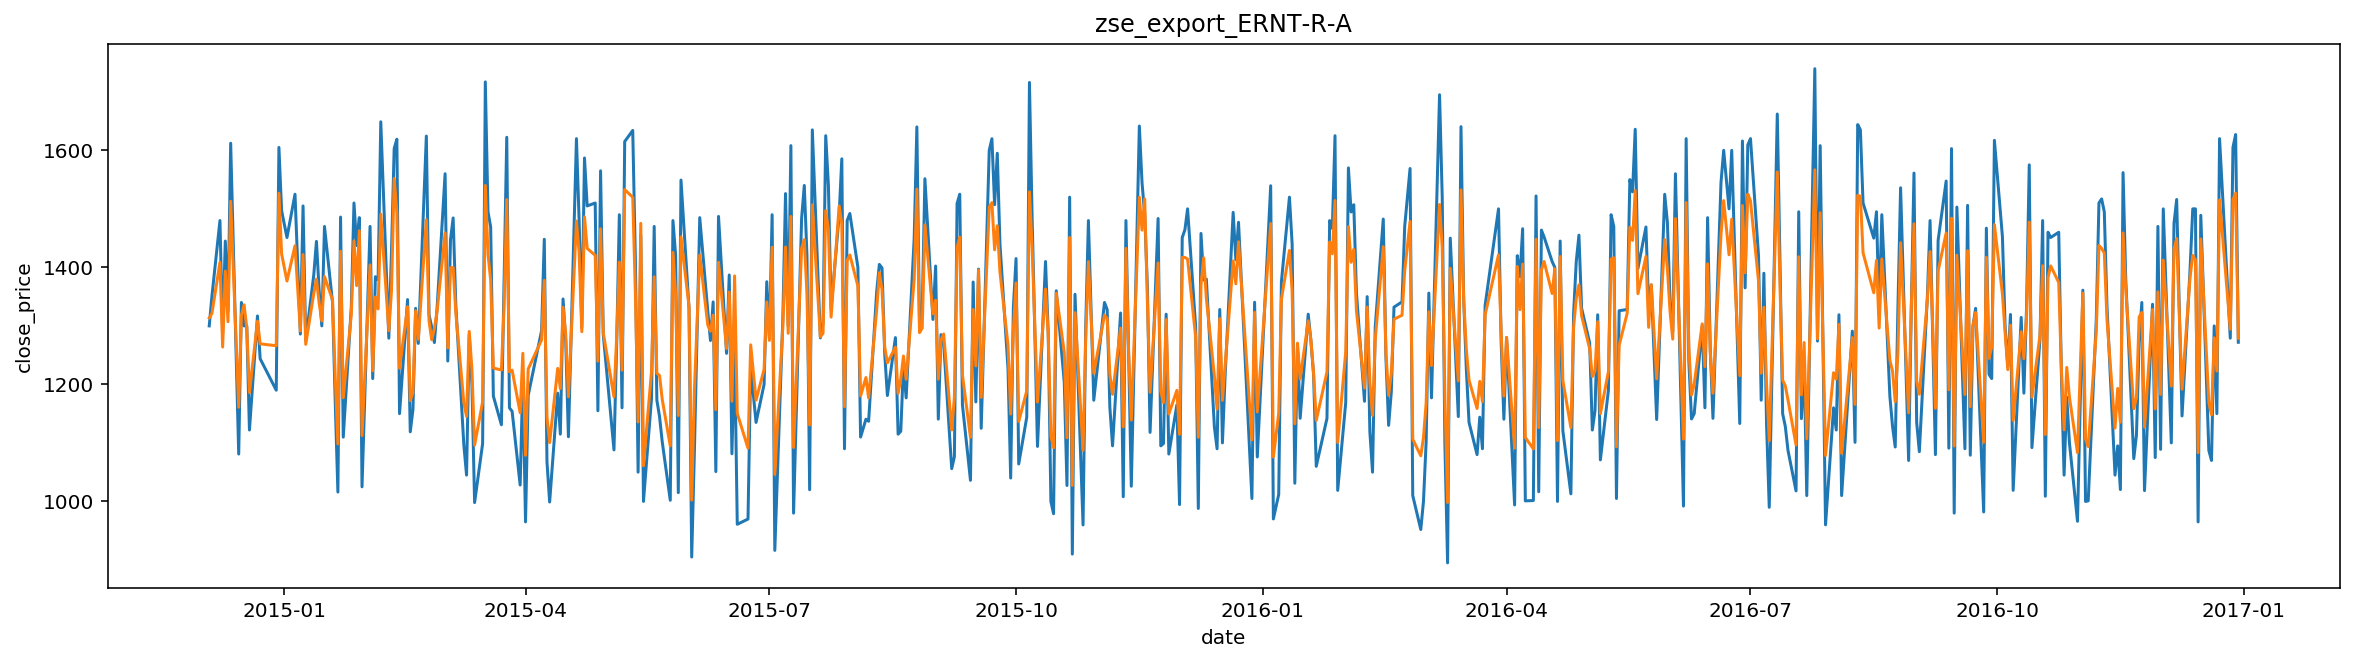

Done for: zse_export_ERNT-R-A
Analysis for: zse_export_ARNT-R-A


type: SVR;
        mse: 1041.914720;
        Parameters: {'base_estimator__scoring': None, 'warm_start': False, 'base_estimator__verbose': 0, 'max_samples': 1.0, 'random_state': <mtrand.RandomState object at 0x7f63bbb2baf8>, 'base_estimator__estimator__coef0': 0.0, 'base_estimator__estimator__shrinking': True, 'n_jobs': 1, 'max_features': 1.0, 'base_estimator__estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'base_estimator__iid': True, 'bootstrap_features': True, 'base_estimator__estimator__degree': 3, 'base_estimator__estimator__kernel': 'rbf', 'base_estimator__error_score': 'raise', 'base_estimator__estimator__cache_size': 200, 'base_estimator__estimator__C': 1.0, 'base_estimator__pre_dispatch': '2*n_jobs', 'base_estimator__estimator__gamma': 'auto', 'base_estimator__estimator__verbose': False, 'verbose': 0, 'base_estimator__fit_params': {}, 'base_estimator__estimator__max_i

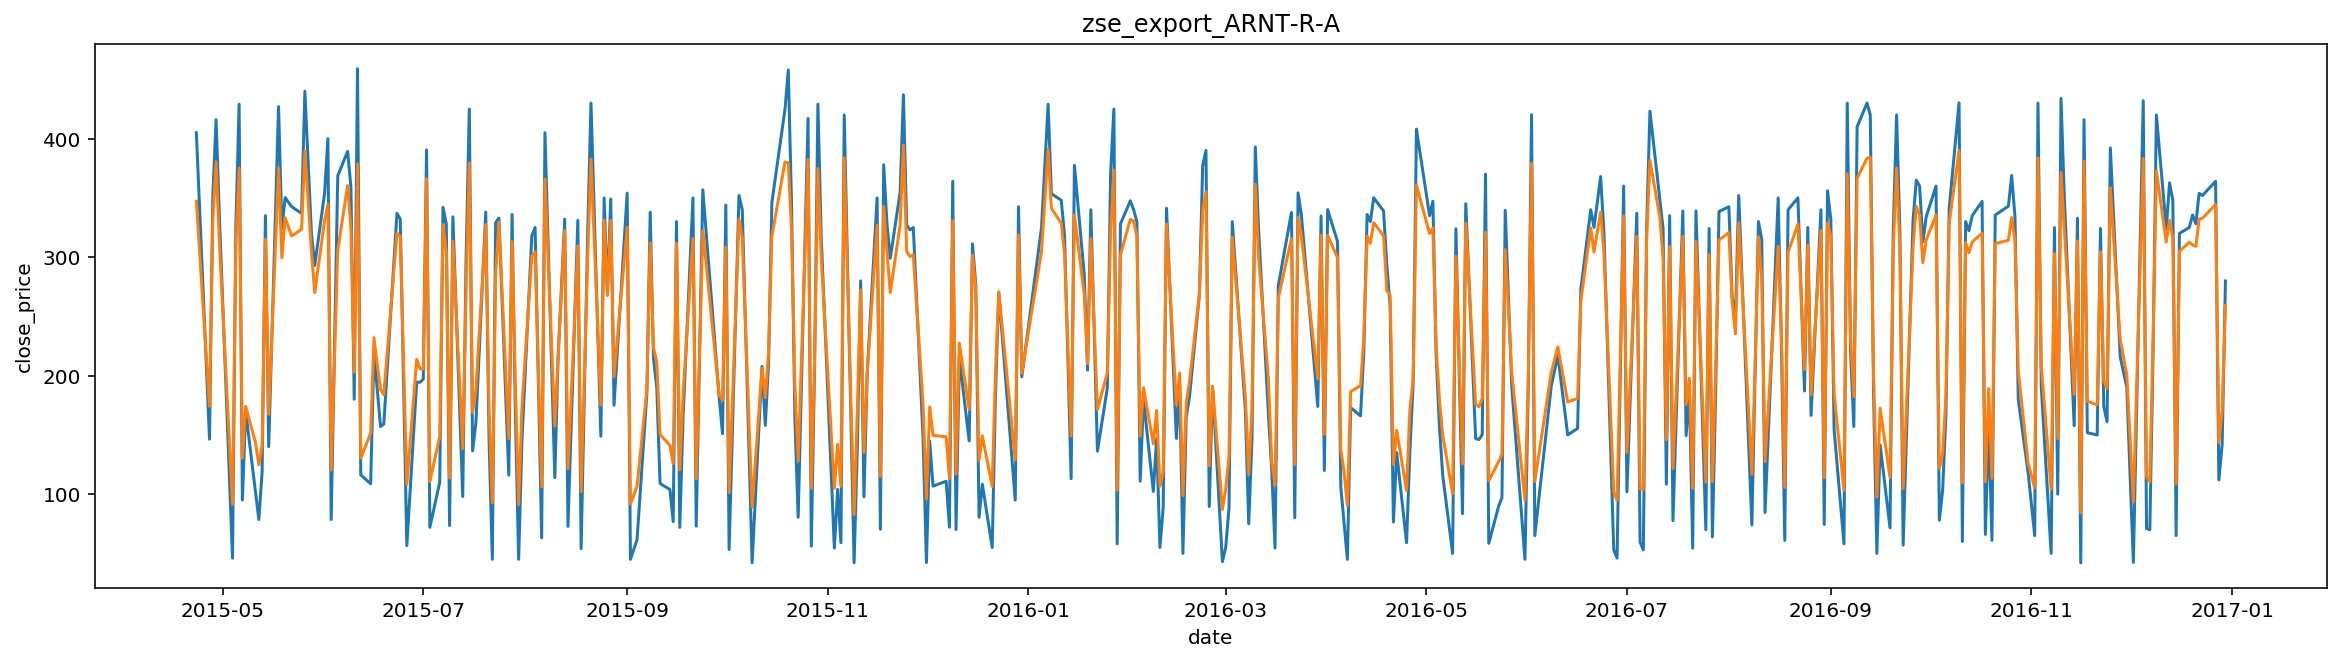

Done for: zse_export_ARNT-R-A
All analysis done



In [2]:
veky_runner.runner("SVR", close_prices_vecs, stock_name_time_stamps, rsi_vecs, mfi_vecs,
           ema_vecs, so_vecs, macd_vecs, sl_vecs, scaler)